<a href="https://colab.research.google.com/github/rajagopalmotivate/try1/blob/master/DCGAN_for_odd_sized_images_ver23_THREE84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
from keras.utils import plot_model
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Using TensorFlow backend.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Double check with Python 3


In [2]:
!pip install pydot pydot-ng


In [0]:
from IPython.display import Image
from keras.utils import plot_model

In [0]:
# Restart runtime to allow Jupyter to know the changes above
import os
#os._exit(0)

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, Average, merge
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from google.colab import files
import copy 

In [0]:
def load_large_data():
    (X_train1, ytrain1), (_, _) = mnist.load_data()
    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([100000,28,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 1000):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*1000 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 600])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_dataPaired():
    
    (X_train1, ytrain1), (_, _) = mnist.load_data()
   # (X_train1, ytrain1), (_, _) = fashion_mnist.load_data()

    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_train1label0 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label1 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label2 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label3 = np.zeros([10000,28,28],dtype=np.uint8)
    
    
    count0 = 0 
    count1 = 1
    count2 = 2 
    count3 = 3
    for i in range(0, 50000):
      if(ytrain1[i]==0):
        X_train1label0[count0] = X_train1[i]
        count0 = count0 +1 
      if(ytrain1[i]==1):
        X_train1label1[count1] = X_train1[i]
        count1 = count1 +1
      if(ytrain1[i]==2):
        X_train1label2[count2] = X_train1[i]
        count2 = count2 +1
      if(ytrain1[i]==3):
        X_train1label3[count3] = X_train1[i]
        count3 = count3 +1
        
    
    totalsamples = 50000
    X_trainlarge = np.zeros([50000,28,56],dtype=np.uint8)
    
    fillount = 0
    for i in range(0, 10000): 
          if( (fillount + 3) > totalsamples  ):
            break
          aimage1 = X_train1label0[i]
          aimage2 = X_train1label1[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1
          aimage1 = X_train1label1[i]
          aimage2 = X_train1label2[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1          
          aimage1 = X_train1label2[i]
          aimage2 = X_train1label3[i]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*10 + j + 14700])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)

    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_dataTHREENandriPaired():
    
    (X_train1, ytrain1), (_, _) = mnist.load_data()
   # (X_train1, ytrain1), (_, _) = fashion_mnist.load_data()

    (X_train2, ytrain2), (_, _) = fashion_mnist.load_data()
    
    X_train1label0 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label1 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label2 = np.zeros([10000,28,28],dtype=np.uint8)
    X_train1label3 = np.zeros([10000,28,28],dtype=np.uint8)
    
    
    count0 = 0 
    count1 = 1
    count2 = 2 
    count3 = 3
    for i in range(0, 50000):
      if(ytrain1[i]==0):
        X_train1label0[count0] = X_train1[i]
        count0 = count0 +1 
      if(ytrain1[i]==1):
        X_train1label1[count1] = X_train1[i]
        count1 = count1 +1
      if(ytrain1[i]==2):
        X_train1label2[count2] = X_train1[i]
        count2 = count2 +1
      if(ytrain1[i]==3):
        X_train1label3[count3] = X_train1[i]
        count3 = count3 +1
        
    
    totalsamples = 50000
    X_trainlarge = np.zeros([50000,28,84],dtype=np.uint8)
    
    fillount = 0
    for i in range(0, 10000): 
          if( (fillount + 3) > totalsamples  ):
            break
          aimage1 = X_train1label0[i]
          aimage2 = X_train1label1[i]
          largeimage =  np.zeros([28,84],dtype=np.uint8)
          largeimage[0:28, 0:84] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          largeimage[0:28, 56:84] = aimage1
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1
          aimage1 = X_train1label1[i]
          aimage2 = X_train1label2[i]
          largeimage =  np.zeros([28,84],dtype=np.uint8)
          largeimage[0:28, 0:84] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          largeimage[0:28, 56:84] = aimage1
          
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1          
          aimage1 = X_train1label2[i]
          aimage2 = X_train1label3[i]
          largeimage =  np.zeros([28,84],dtype=np.uint8)
          largeimage[0:28, 0:84] = 40
          largeimage[0:28, 0:28] = aimage1
          largeimage[0:28, 28:56] = aimage2
          largeimage[0:28, 56:84] = aimage1
          
          X_trainlarge[fillount] = largeimage
          fillount = fillount + 1 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*10 + j + 14700])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)

    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_data5656():
    (X_train1, _), (_, _) = mnist.load_data()
    (X_train2, _), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([10000,56,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 100):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([56,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage2
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*100 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 1000])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

(60000, 28, 28)
(100000, 28, 56)


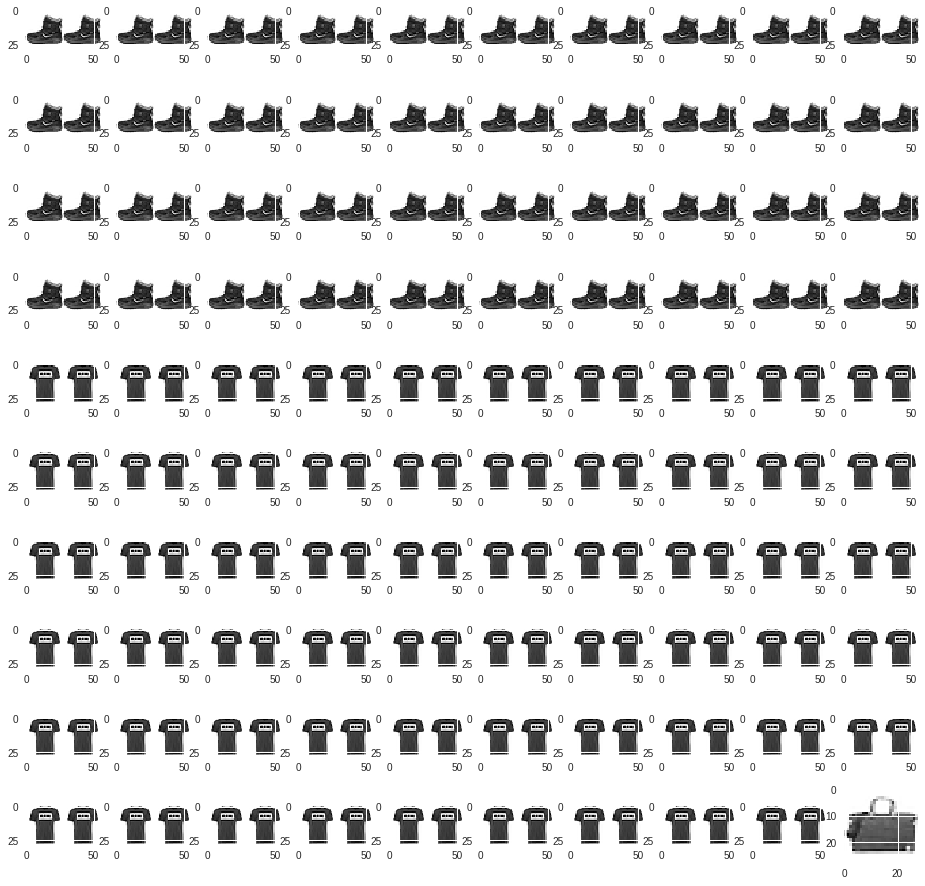

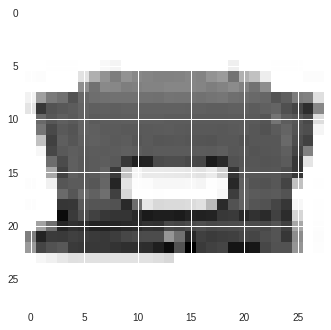

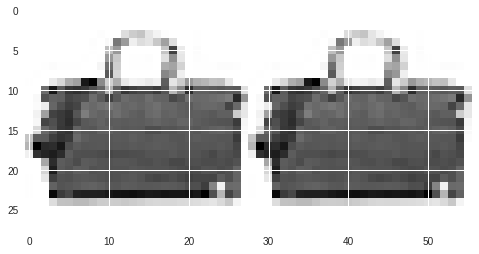

In [10]:
X_trainlarge = load_large_data()

In [0]:
#X_trainlarge5656 = load_large_data5656()

(60000, 28, 28)
(50000, 28, 84)


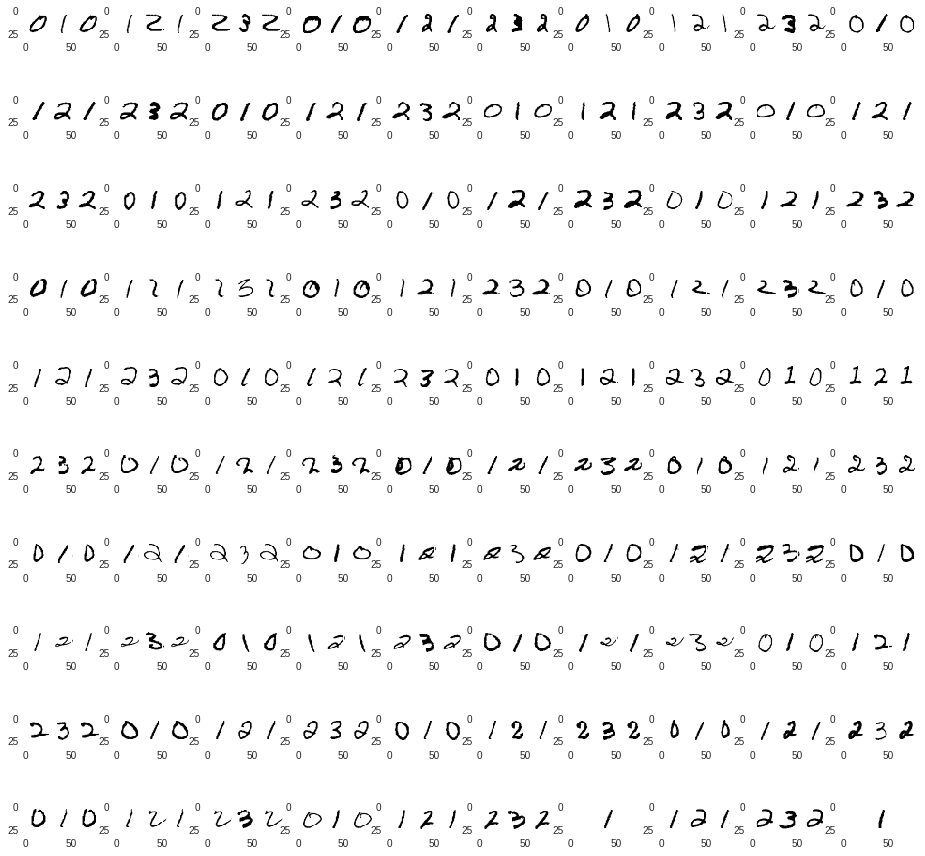

In [12]:
#X_trainlargepaired = load_large_dataPaired()
X_trainlargepaired = load_large_dataTHREENandriPaired()

In [0]:
def load_databydatasetname(datasetname):
  if (datasetname == 1):   
    (X_train, _), (_, _) = mnist.load_data()
  if (datasetname == 2):   
    (X_train, _), (_, _) = fashion_mnist.load_data()
  if (datasetname == 3):   
     X_train = X_trainlarge
  if (datasetname == 4):   
     X_train = X_trainlarge5656
  if (datasetname == 5):   
     X_train = X_trainlargepaired
      
  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  X_train = np.expand_dims(X_train, axis=3)
  return X_train
  

In [0]:
def build_discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
  #  print("-- Discriminator -- ")
   # model.summary()
    return model

In [0]:
def save_imgs(generator, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()

In [0]:
def save_imgs_all(generator1, generator2, generator3, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator1.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()
    
    gen_imgs = generator2.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()
    
    gen_imgs = generator3.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

In [0]:


def plotamodel(amodel, showdetails=True):
  # Model summary
  print(amodel.summary())

  if (showdetails==True):
    # Plot model graph
    plot_model(amodel, show_shapes=True, show_layer_names=True, to_file='model.png')
    #Image(retina=True, filename='model.png')
  if (showdetails==False):
    # Plot model graph
    plot_model(amodel, show_shapes=False, show_layer_names=False, to_file='modelsmall.png')
   # Image(retina=True, filename='modelsmall.png')

In [0]:
def build_combined_model():

    discriminatormymodel = build_classifier_model

    generatormymodel = build_generator_model()
   
    optimizer1 = Adam(lr=0.0002, beta_1=0.5)


    z = Input(shape=(100,))
    img = generatormymodel(z)
    discriminatormymodel.trainable = False
    real = discriminatormymodel(img)
    
    combined = Model(z, real)
    
    combined.compile(loss='binary_crossentropy', optimizer=optimizer1)
    return combined

In [0]:
def getlastlayer(amodel):
  for layer in amodel.layers:
    layerlast = layer
  print(layer)
  print(layer.get_config())
  print(layer.input)
  print(layer.input_shape)
  print(layer.output)
  print('output shape of last is ')
  print(layer.output_shape)
  return layer

In [0]:
def build_modelsNandriNEW(averagemode = 1, loadpretrainedweights=False):
    z = Input(shape=(100,))
    inputz = z
    x = Dense(128 * 7 * 7, activation="relu")(inputz)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)    
    generator1 = Model(inputz, out)
    
    inputz2 = z
    x1 = Dense(128 * 7 * 7, activation="relu")(inputz2)
    x1 = Reshape((7, 7, 128))(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(128, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(64, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = Conv2D(1, kernel_size=3, padding="same")(x1)
    out1 = Activation("tanh")(x1)    
    generator2 = Model(inputz2, out1)
    
    
    inputz3 = z
    x3 = Dense(128 * 7 * 7, activation="relu")(inputz3)
    x3 = Reshape((7, 7, 128))(x3)
    x3 = BatchNormalization(momentum=0.8)(x3)
    x3 = UpSampling2D()(x3)
    x3 = Conv2D(128, kernel_size=3, padding="same")(x3)
    x3 = Activation("relu")(x3)
    x3 = BatchNormalization(momentum=0.8)(x3)
    x3 = UpSampling2D()(x3)
    x3 = Conv2D(64, kernel_size=3, padding="same")(x3)
    x3 = Activation("relu")(x3)
    x3 = BatchNormalization(momentum=0.8)(x3)
    x3 = Conv2D(1, kernel_size=3, padding="same")(x3)
    out2 = Activation("tanh")(x3)    
    generator3 = Model(inputz3, out2)
    
    
    img1 = generator1(z)
    img2 = generator2(z)
    img3 = generator3(z)
    
    aoptimizer = Adam(lr=0.0002, beta_1=0.5)   
    discriminator = build_discriminator(img_shape=(28, 84, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
    
    if(averagemode == 1):
          models = [generator1, generator1, generator1]
    if(averagemode == 2):
          models = [generator2, generator2, generator2]
    if(averagemode == 3):
          models = [generator1, generator2, generator3]
    if(averagemode == 4):
          models = [generator3, generator3, generator3]


  ##  models = [generator1, generator2]
 ##   models = [generator1, generator1]
    outputs = [model.outputs[0] for model in models]
    for obj1 in outputs:
      print(type(obj1))
      print(obj1.shape)
        
    mergedlayer = Concatenate(axis=2)(outputs)
    ##x = merge([lstm_out, auxiliary_input], mode='concat')
   ## output = merge([tower_1, tower_2, tower_3], mode='concat', concat_axis=1)
  #  mergedlayer = merge([generator1, generator2], mode='concat', concat_axis=1)
  
   #mergedlayer = merge([out1, out], mode='concat', concat_axis=1)
#contact axis can be -1 to 0 , 1 for inception , 2 , 3 or remove it
  #  mergedlayer = merge([generator1, generator1])

    print('merge layers')
    print(out1.shape)
    print(out.shape)
    print(mergedlayer.shape)

  

    
    
    mergedmodel = Model(z, mergedlayer)
    
    discriminator.trainable = False
    real = discriminator(mergedlayer)
    combined = Model(z, real)
   # discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
  
        

    
    if(loadpretrainedweights==True):
      #generator1.load_weights('my_model_weights_mnistver2.h5')
      generator1.load_weights('my_model_weights_orgmnist.h5')
      #generator2.load_weights('my_model_weights_mnist.h5')
      #generator1 = load_model('generator2fmnist.h5')
      #generator2 = load_model('generator2fmnist.h5')
      

    generator1.trainable = False
    
    generator1.compile(loss='binary_crossentropy', optimizer=aoptimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=aoptimizer)  
    generator3.compile(loss='binary_crossentropy', optimizer=aoptimizer)  
    
    combined.compile(loss='binary_crossentropy', optimizer=aoptimizer) 
  
   # plotamodel(mergedmodel)
   # plotamodel(combined)
    
    return generator1, generator2, generator3, discriminator, combined ,  mergedmodel

In [0]:
def train(generator1, generator2, generator3, discriminator, combined, mergedmodel,  epochs=2000, batch_size=128, save_interval=50, modeltotrain=1):

    X_train = load_databydatasetname(2)
    X_train5656 = None

    
    if modeltotrain == 3:
          X_train5656 = load_databydatasetname(3)
         # X_train = load_databydatasetname(5)

    num_examples = X_train.shape[0]
    num_batches = int(num_examples / float(batch_size))
    print('Number of examples: ', num_examples)
    print('Number of Batches: ', num_batches)
    print('Number of epochs: ', epochs)

    half_batch = int(batch_size / 2)
    ##quater_batch = int(half_batch / 2) 

    for epoch in range(epochs + 1):
        for batch in range(num_batches):
            noise1 = np.random.normal(0, 1, (half_batch, 100))
            fake_images1 = generator1.predict(noise1)
            fake_labels1 = np.zeros((half_batch, 1))
            
           ## noise2 = np.random.normal(0, 1, (half_batch, 100))
            noise2 = copy.deepcopy(noise1)
            fake_images2 = generator2.predict(noise2)
            fake_labels2 = np.zeros((half_batch, 1))
            
            noise3 = copy.deepcopy(noise1)
            fake_images0 = generator3.predict(noise3)
            fake_labels0 = np.zeros((half_batch, 1))
        
            
           ## fake_images = np.append(fake_images1 , fake_images2, axis=0)
           ## fake_labels = np.append( fake_labels1 , fake_labels2, axis=0)
            
            if modeltotrain == 1:
              fake_images = fake_images1
              fake_labels = fake_labels1
            if modeltotrain == 2:
              fake_images = fake_images2
              fake_labels = fake_labels2              
            if modeltotrain == 0:
              fake_images = fake_images0
              fake_labels = fake_labels0 
              
            if modeltotrain == 3:
              noise5 = copy.deepcopy(noise1)
              fake_images3 = mergedmodel.predict(noise5)
              fake_labels3 = np.zeros((half_batch, 1))    
              fake_images = fake_images3
              fake_labels = fake_labels3              
            


            X_train = X_trainlarge
            X_train = X_trainlargepaired
            #X_train = X_train5656
            # real images for batch
            idx = np.random.randint(0, X_train.shape[0], half_batch)            
            real_images = X_train[idx]
            real_labels = np.ones((half_batch, 1))
            
            if(batch == 0):
              print('noise half batch')
              print(noise1.shape)
              print("G1 output numpy array shape")
              print(fake_images1.shape)
              print("G1+G2 appended numpy array shape")
              print(fake_images.shape)
              print("real images")
              print(real_images.shape)

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, 100))
            
            # Train the generator
            g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

            # Plot the progress
            print("Epoch %d Batch %d/%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (epoch,batch, num_batches, d_loss[0], 100 * d_loss[1], g_loss))

            if batch % 100 == 0:
                 save_imgs_all(generator1, generator2, mergedmodel,  epoch, batch)
            #if batch % 101 == 0:
                 #save_imgs(generator2, epoch, batch)
            #if batch % 102 == 0:
                 #save_imgs(mergedmodel, epoch, batch)
                








In [22]:

generator1, generator2, generator3, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)




    
    

    


<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
merge layers
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 84, 1)


In [23]:
plotamodel(mergedmodel)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 

In [24]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnist.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnistver2.h5
!wget https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_orgmnist.h5

  

  

--2018-12-08 07:58:52--  https://github.com/rajagopalmotivate/try1/raw/master/my_model_weights_mnist.h5
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajagopalmotivate/try1/master/my_model_weights_mnist.h5 [following]
--2018-12-08 07:58:52--  https://raw.githubusercontent.com/rajagopalmotivate/try1/master/my_model_weights_mnist.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3460672 (3.3M) [application/octet-stream]
Saving to: ‘my_model_weights_mnist.h5.4’

my_model_weights_mn 100%[===================>]   3.30M  --.-KB/s    in 0.06s   

2018-12-08 07:58:53 (56.8 MB/s) - ‘my_m

In [25]:
plotamodel(combined)
files.download('model.png')




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 

In [26]:
plotamodel(discriminator)
files.download('model.png')




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 84, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 42, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 42, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 42, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 21, 64)         18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 22, 64)         0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 22, 64)         0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
#train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=10, modeltotrain=1)

In [29]:
hiii
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 2 ,  loadpretrainedweights=True)




    
    

    


NameError: ignored

Number of examples:  60000
Number of Batches:  1875
Number of epochs:  1
noise half batch
(16, 100)
G1 output numpy array shape
(16, 28, 28, 1)
G1+G2 appended numpy array shape
(16, 28, 84, 1)
real images
(16, 28, 84, 1)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 0 Batch 0/1875 [D loss: 0.895550, acc.: 50.00%] [G loss: 1.050107]


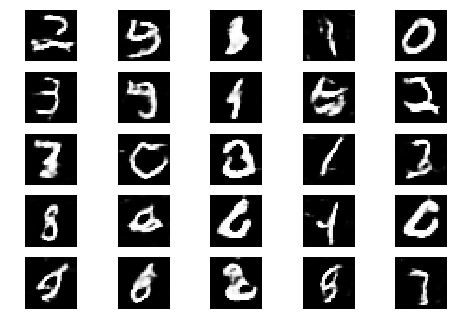

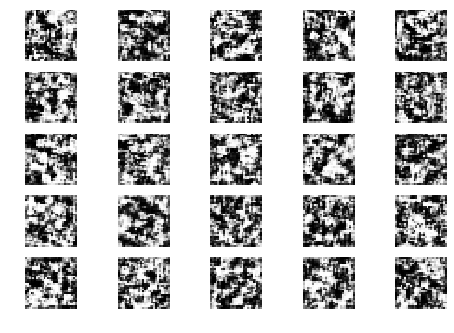

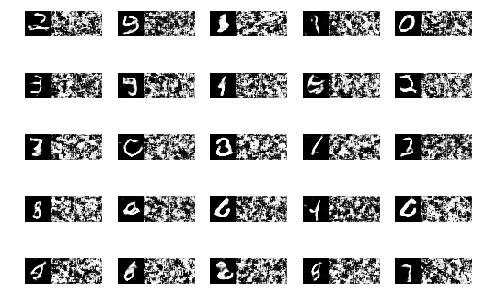

Epoch 0 Batch 1/1875 [D loss: 0.614461, acc.: 62.50%] [G loss: 1.029693]
Epoch 0 Batch 2/1875 [D loss: 0.400536, acc.: 87.50%] [G loss: 1.649728]
Epoch 0 Batch 3/1875 [D loss: 0.268950, acc.: 96.88%] [G loss: 1.837743]
Epoch 0 Batch 4/1875 [D loss: 0.282424, acc.: 90.62%] [G loss: 2.188265]
Epoch 0 Batch 5/1875 [D loss: 0.172876, acc.: 96.88%] [G loss: 2.558228]
Epoch 0 Batch 6/1875 [D loss: 0.185954, acc.: 96.88%] [G loss: 2.582200]
Epoch 0 Batch 7/1875 [D loss: 0.143046, acc.: 100.00%] [G loss: 2.951635]
Epoch 0 Batch 8/1875 [D loss: 0.119723, acc.: 100.00%] [G loss: 2.964984]
Epoch 0 Batch 9/1875 [D loss: 0.108696, acc.: 100.00%] [G loss: 3.079347]
Epoch 0 Batch 10/1875 [D loss: 0.098654, acc.: 100.00%] [G loss: 3.217798]
Epoch 0 Batch 11/1875 [D loss: 0.089275, acc.: 100.00%] [G loss: 3.234138]
Epoch 0 Batch 12/1875 [D loss: 0.072780, acc.: 100.00%] [G loss: 3.301310]
Epoch 0 Batch 13/1875 [D loss: 0.073034, acc.: 100.00%] [G loss: 3.404573]
Epoch 0 Batch 14/1875 [D loss: 0.122141,

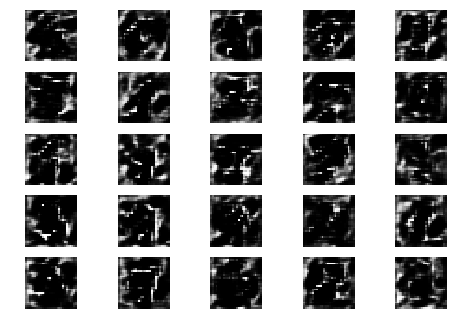

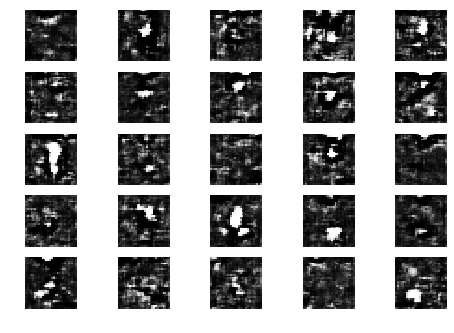

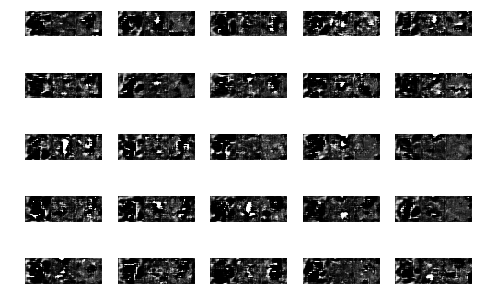

Epoch 0 Batch 101/1875 [D loss: 1.397050, acc.: 31.25%] [G loss: 3.760211]
Epoch 0 Batch 102/1875 [D loss: 0.499307, acc.: 75.00%] [G loss: 3.491704]
Epoch 0 Batch 103/1875 [D loss: 0.200890, acc.: 93.75%] [G loss: 3.558346]
Epoch 0 Batch 104/1875 [D loss: 0.346236, acc.: 84.38%] [G loss: 4.069719]
Epoch 0 Batch 105/1875 [D loss: 0.498514, acc.: 68.75%] [G loss: 3.027174]
Epoch 0 Batch 106/1875 [D loss: 0.140309, acc.: 100.00%] [G loss: 4.239827]
Epoch 0 Batch 107/1875 [D loss: 0.719412, acc.: 65.62%] [G loss: 2.074262]
Epoch 0 Batch 108/1875 [D loss: 0.370497, acc.: 84.38%] [G loss: 3.426139]
Epoch 0 Batch 109/1875 [D loss: 0.542975, acc.: 75.00%] [G loss: 3.422579]
Epoch 0 Batch 110/1875 [D loss: 1.094341, acc.: 31.25%] [G loss: 0.661728]
Epoch 0 Batch 111/1875 [D loss: 0.734794, acc.: 65.62%] [G loss: 1.811184]
Epoch 0 Batch 112/1875 [D loss: 0.491479, acc.: 78.12%] [G loss: 2.365578]
Epoch 0 Batch 113/1875 [D loss: 0.499757, acc.: 75.00%] [G loss: 0.738336]
Epoch 0 Batch 114/1875 [

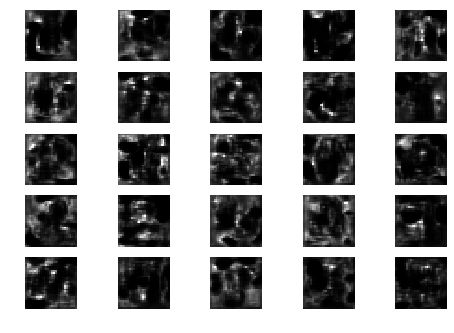

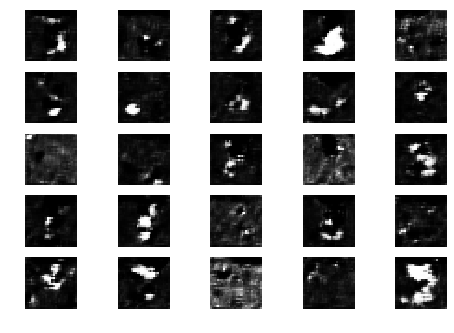

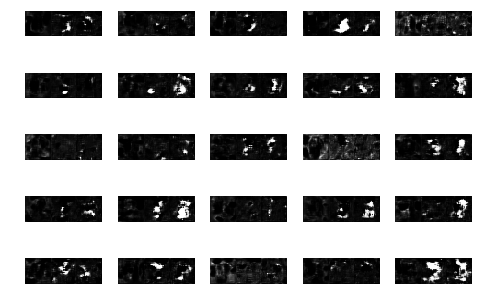

Epoch 0 Batch 201/1875 [D loss: 0.577449, acc.: 68.75%] [G loss: 2.101989]
Epoch 0 Batch 202/1875 [D loss: 0.368830, acc.: 90.62%] [G loss: 2.020225]
Epoch 0 Batch 203/1875 [D loss: 0.621762, acc.: 53.12%] [G loss: 1.915045]
Epoch 0 Batch 204/1875 [D loss: 0.488585, acc.: 71.88%] [G loss: 1.865712]
Epoch 0 Batch 205/1875 [D loss: 0.638559, acc.: 59.38%] [G loss: 1.591074]
Epoch 0 Batch 206/1875 [D loss: 0.593445, acc.: 68.75%] [G loss: 1.945996]
Epoch 0 Batch 207/1875 [D loss: 1.066233, acc.: 59.38%] [G loss: 2.352870]
Epoch 0 Batch 208/1875 [D loss: 1.037630, acc.: 46.88%] [G loss: 1.431408]
Epoch 0 Batch 209/1875 [D loss: 0.734429, acc.: 65.62%] [G loss: 1.703974]
Epoch 0 Batch 210/1875 [D loss: 0.804866, acc.: 56.25%] [G loss: 2.014434]
Epoch 0 Batch 211/1875 [D loss: 0.658656, acc.: 75.00%] [G loss: 1.487909]
Epoch 0 Batch 212/1875 [D loss: 0.521880, acc.: 78.12%] [G loss: 1.958082]
Epoch 0 Batch 213/1875 [D loss: 0.429320, acc.: 78.12%] [G loss: 1.851019]
Epoch 0 Batch 214/1875 [D

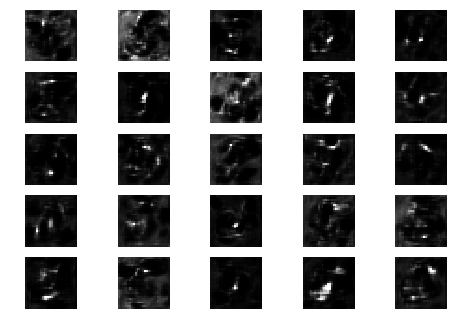

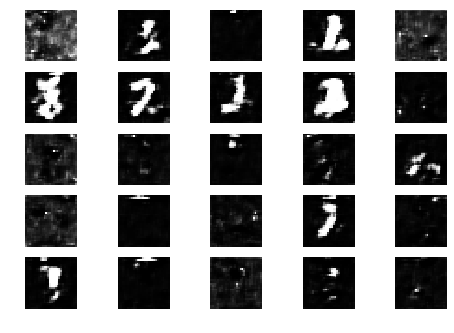

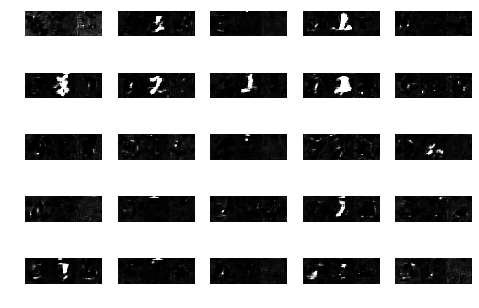

Epoch 0 Batch 301/1875 [D loss: 0.658038, acc.: 59.38%] [G loss: 1.829107]
Epoch 0 Batch 302/1875 [D loss: 0.412218, acc.: 81.25%] [G loss: 2.056392]
Epoch 0 Batch 303/1875 [D loss: 1.180907, acc.: 43.75%] [G loss: 1.084724]
Epoch 0 Batch 304/1875 [D loss: 0.853375, acc.: 68.75%] [G loss: 1.837184]
Epoch 0 Batch 305/1875 [D loss: 1.276736, acc.: 50.00%] [G loss: 1.796491]
Epoch 0 Batch 306/1875 [D loss: 0.577001, acc.: 68.75%] [G loss: 1.752385]
Epoch 0 Batch 307/1875 [D loss: 0.853656, acc.: 56.25%] [G loss: 1.692522]
Epoch 0 Batch 308/1875 [D loss: 0.862381, acc.: 46.88%] [G loss: 1.650315]
Epoch 0 Batch 309/1875 [D loss: 0.455538, acc.: 81.25%] [G loss: 1.935934]
Epoch 0 Batch 310/1875 [D loss: 0.513726, acc.: 81.25%] [G loss: 2.104650]
Epoch 0 Batch 311/1875 [D loss: 0.311901, acc.: 90.62%] [G loss: 2.743333]
Epoch 0 Batch 312/1875 [D loss: 0.630783, acc.: 62.50%] [G loss: 2.511414]
Epoch 0 Batch 313/1875 [D loss: 0.284490, acc.: 87.50%] [G loss: 1.756270]
Epoch 0 Batch 314/1875 [D

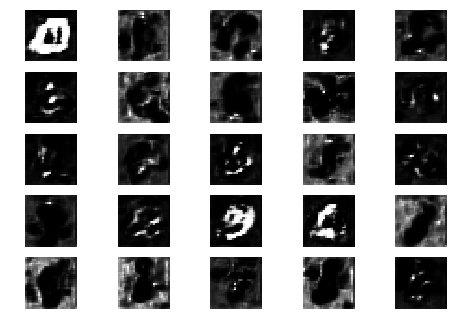

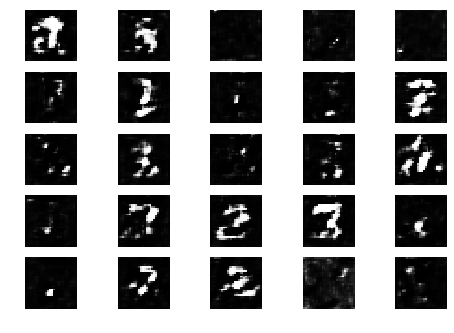

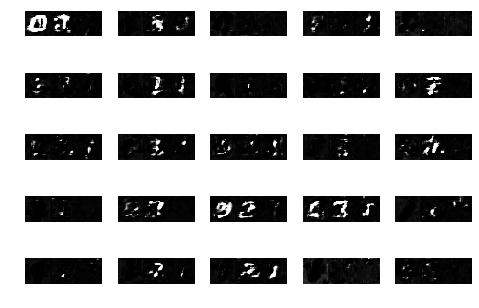

Epoch 0 Batch 401/1875 [D loss: 0.368539, acc.: 90.62%] [G loss: 1.730546]
Epoch 0 Batch 402/1875 [D loss: 0.938179, acc.: 46.88%] [G loss: 1.753212]
Epoch 0 Batch 403/1875 [D loss: 1.037376, acc.: 40.62%] [G loss: 1.355158]
Epoch 0 Batch 404/1875 [D loss: 0.707163, acc.: 68.75%] [G loss: 2.076152]
Epoch 0 Batch 405/1875 [D loss: 0.703842, acc.: 62.50%] [G loss: 2.293354]
Epoch 0 Batch 406/1875 [D loss: 0.780267, acc.: 59.38%] [G loss: 1.930901]
Epoch 0 Batch 407/1875 [D loss: 1.212158, acc.: 56.25%] [G loss: 1.258937]
Epoch 0 Batch 408/1875 [D loss: 0.554358, acc.: 84.38%] [G loss: 1.352405]
Epoch 0 Batch 409/1875 [D loss: 0.621037, acc.: 75.00%] [G loss: 1.424777]
Epoch 0 Batch 410/1875 [D loss: 0.685595, acc.: 59.38%] [G loss: 1.452806]
Epoch 0 Batch 411/1875 [D loss: 0.998776, acc.: 62.50%] [G loss: 1.747325]
Epoch 0 Batch 412/1875 [D loss: 0.441241, acc.: 78.12%] [G loss: 1.747883]
Epoch 0 Batch 413/1875 [D loss: 0.709774, acc.: 68.75%] [G loss: 1.132683]
Epoch 0 Batch 414/1875 [D

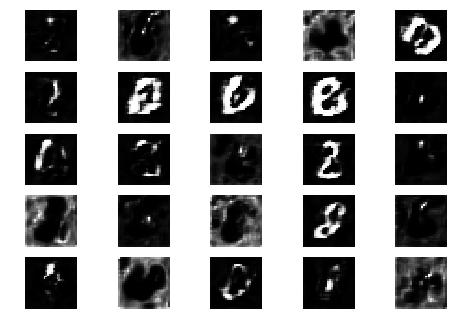

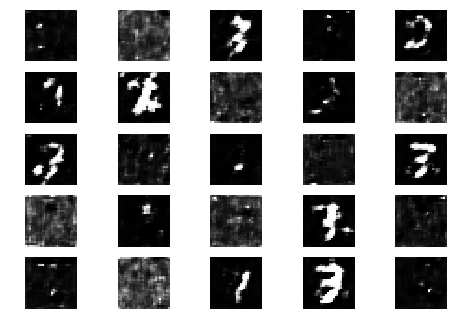

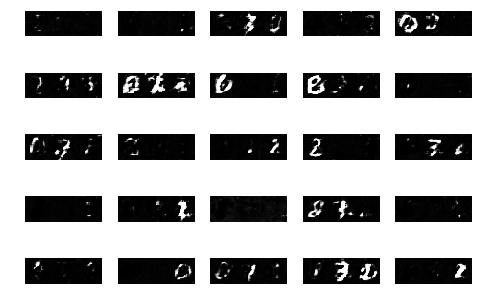

Epoch 0 Batch 501/1875 [D loss: 0.970883, acc.: 43.75%] [G loss: 1.319551]
Epoch 0 Batch 502/1875 [D loss: 0.725461, acc.: 68.75%] [G loss: 2.203879]
Epoch 0 Batch 503/1875 [D loss: 0.689453, acc.: 56.25%] [G loss: 1.228716]
Epoch 0 Batch 504/1875 [D loss: 0.580864, acc.: 71.88%] [G loss: 1.583692]
Epoch 0 Batch 505/1875 [D loss: 0.828287, acc.: 50.00%] [G loss: 1.276706]
Epoch 0 Batch 506/1875 [D loss: 0.655421, acc.: 59.38%] [G loss: 1.882149]
Epoch 0 Batch 507/1875 [D loss: 0.673734, acc.: 68.75%] [G loss: 1.276151]
Epoch 0 Batch 508/1875 [D loss: 0.890154, acc.: 56.25%] [G loss: 2.236561]
Epoch 0 Batch 509/1875 [D loss: 0.596142, acc.: 53.12%] [G loss: 1.727628]
Epoch 0 Batch 510/1875 [D loss: 0.720645, acc.: 65.62%] [G loss: 1.608480]
Epoch 0 Batch 511/1875 [D loss: 0.440754, acc.: 93.75%] [G loss: 1.519444]
Epoch 0 Batch 512/1875 [D loss: 0.671805, acc.: 71.88%] [G loss: 1.487514]
Epoch 0 Batch 513/1875 [D loss: 0.418622, acc.: 87.50%] [G loss: 1.911435]
Epoch 0 Batch 514/1875 [D

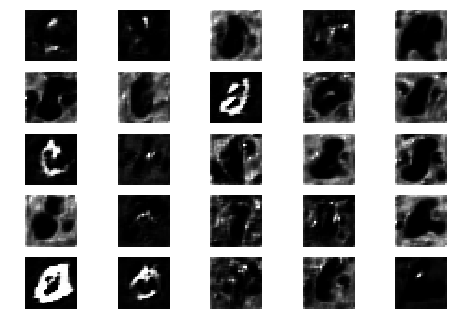

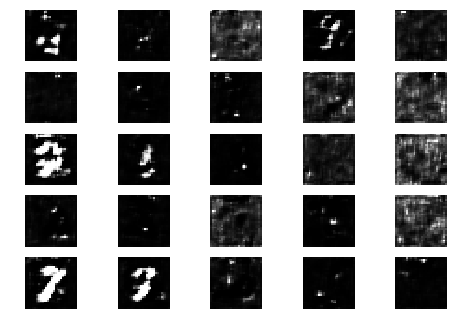

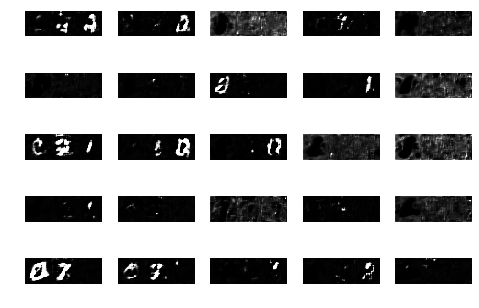

Epoch 0 Batch 601/1875 [D loss: 0.475191, acc.: 71.88%] [G loss: 2.079124]
Epoch 0 Batch 602/1875 [D loss: 0.831521, acc.: 50.00%] [G loss: 1.141387]
Epoch 0 Batch 603/1875 [D loss: 0.967478, acc.: 59.38%] [G loss: 1.183352]
Epoch 0 Batch 604/1875 [D loss: 0.748047, acc.: 65.62%] [G loss: 1.469206]
Epoch 0 Batch 605/1875 [D loss: 1.041975, acc.: 43.75%] [G loss: 1.499441]
Epoch 0 Batch 606/1875 [D loss: 0.790947, acc.: 62.50%] [G loss: 1.756305]
Epoch 0 Batch 607/1875 [D loss: 0.550755, acc.: 68.75%] [G loss: 1.886041]
Epoch 0 Batch 608/1875 [D loss: 0.607568, acc.: 68.75%] [G loss: 1.365042]
Epoch 0 Batch 609/1875 [D loss: 0.857662, acc.: 46.88%] [G loss: 1.148022]
Epoch 0 Batch 610/1875 [D loss: 0.688591, acc.: 65.62%] [G loss: 1.807032]
Epoch 0 Batch 611/1875 [D loss: 0.605659, acc.: 59.38%] [G loss: 1.843382]
Epoch 0 Batch 612/1875 [D loss: 0.520754, acc.: 75.00%] [G loss: 1.469180]
Epoch 0 Batch 613/1875 [D loss: 0.401621, acc.: 81.25%] [G loss: 1.501137]
Epoch 0 Batch 614/1875 [D

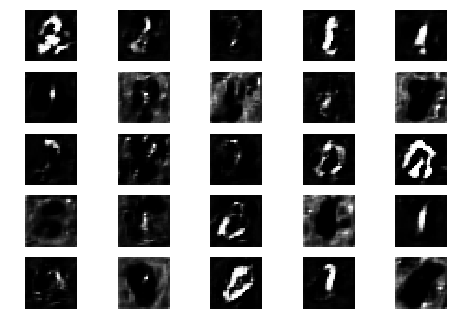

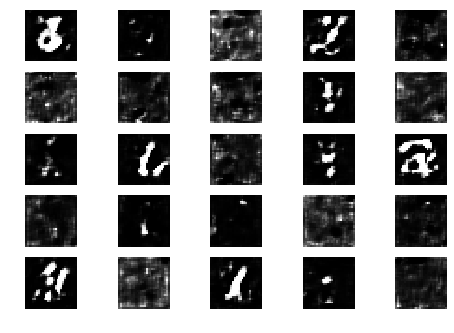

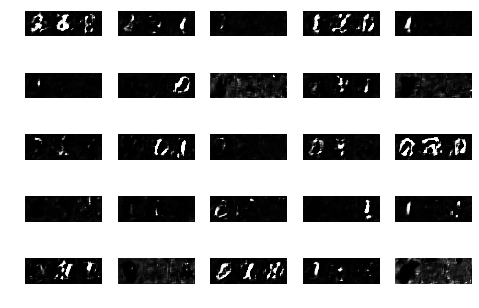

Epoch 0 Batch 701/1875 [D loss: 1.128068, acc.: 28.12%] [G loss: 0.986958]
Epoch 0 Batch 702/1875 [D loss: 0.461444, acc.: 71.88%] [G loss: 1.690508]
Epoch 0 Batch 703/1875 [D loss: 0.818379, acc.: 46.88%] [G loss: 1.178728]
Epoch 0 Batch 704/1875 [D loss: 0.686128, acc.: 62.50%] [G loss: 1.804557]
Epoch 0 Batch 705/1875 [D loss: 0.568619, acc.: 75.00%] [G loss: 1.168893]
Epoch 0 Batch 706/1875 [D loss: 0.282923, acc.: 90.62%] [G loss: 1.539397]
Epoch 0 Batch 707/1875 [D loss: 0.580592, acc.: 75.00%] [G loss: 1.386424]
Epoch 0 Batch 708/1875 [D loss: 0.501780, acc.: 84.38%] [G loss: 1.782953]
Epoch 0 Batch 709/1875 [D loss: 0.732116, acc.: 53.12%] [G loss: 1.811217]
Epoch 0 Batch 710/1875 [D loss: 0.711641, acc.: 68.75%] [G loss: 1.398120]
Epoch 0 Batch 711/1875 [D loss: 0.697862, acc.: 62.50%] [G loss: 1.612053]
Epoch 0 Batch 712/1875 [D loss: 0.505611, acc.: 75.00%] [G loss: 1.349720]
Epoch 0 Batch 713/1875 [D loss: 0.488721, acc.: 78.12%] [G loss: 1.366211]
Epoch 0 Batch 714/1875 [D

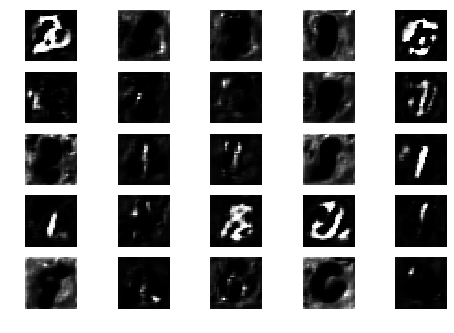

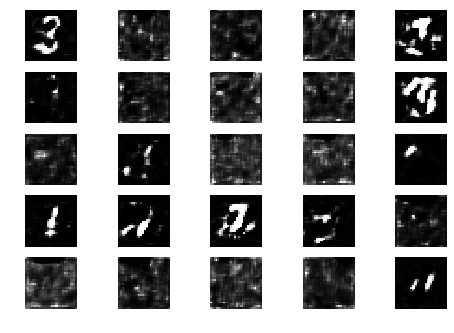

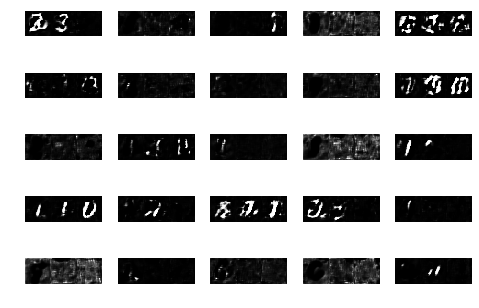

Epoch 0 Batch 801/1875 [D loss: 0.835080, acc.: 53.12%] [G loss: 1.149424]
Epoch 0 Batch 802/1875 [D loss: 0.816612, acc.: 59.38%] [G loss: 1.755045]
Epoch 0 Batch 803/1875 [D loss: 0.884766, acc.: 56.25%] [G loss: 1.510900]
Epoch 0 Batch 804/1875 [D loss: 0.816033, acc.: 50.00%] [G loss: 1.148840]
Epoch 0 Batch 805/1875 [D loss: 0.713336, acc.: 53.12%] [G loss: 1.756306]
Epoch 0 Batch 806/1875 [D loss: 0.768377, acc.: 59.38%] [G loss: 1.322578]
Epoch 0 Batch 807/1875 [D loss: 0.671543, acc.: 59.38%] [G loss: 1.278855]
Epoch 0 Batch 808/1875 [D loss: 1.144385, acc.: 31.25%] [G loss: 1.404723]
Epoch 0 Batch 809/1875 [D loss: 0.672827, acc.: 65.62%] [G loss: 0.865175]
Epoch 0 Batch 810/1875 [D loss: 0.702467, acc.: 56.25%] [G loss: 1.469408]
Epoch 0 Batch 811/1875 [D loss: 0.500741, acc.: 68.75%] [G loss: 1.334611]
Epoch 0 Batch 812/1875 [D loss: 0.749211, acc.: 53.12%] [G loss: 0.976782]
Epoch 0 Batch 813/1875 [D loss: 0.868690, acc.: 50.00%] [G loss: 1.652942]
Epoch 0 Batch 814/1875 [D

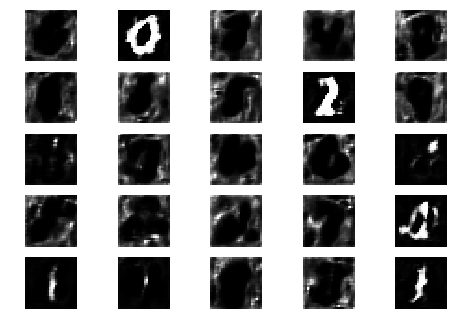

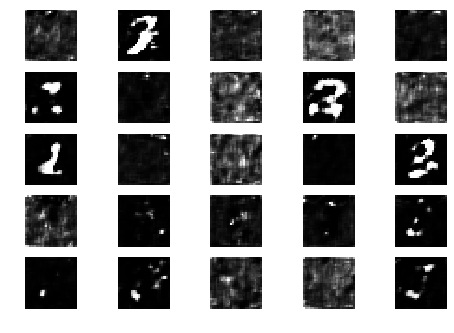

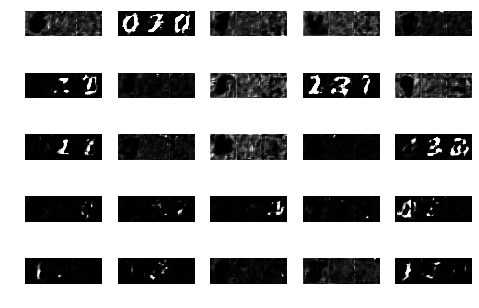

Epoch 0 Batch 901/1875 [D loss: 1.031622, acc.: 34.38%] [G loss: 1.087605]
Epoch 0 Batch 902/1875 [D loss: 0.886396, acc.: 50.00%] [G loss: 1.255939]
Epoch 0 Batch 903/1875 [D loss: 0.706197, acc.: 71.88%] [G loss: 1.290438]
Epoch 0 Batch 904/1875 [D loss: 0.798243, acc.: 53.12%] [G loss: 1.661754]
Epoch 0 Batch 905/1875 [D loss: 0.901705, acc.: 37.50%] [G loss: 1.423710]
Epoch 0 Batch 906/1875 [D loss: 0.576198, acc.: 65.62%] [G loss: 0.952370]
Epoch 0 Batch 907/1875 [D loss: 0.588793, acc.: 62.50%] [G loss: 1.190481]
Epoch 0 Batch 908/1875 [D loss: 0.790956, acc.: 62.50%] [G loss: 1.676239]
Epoch 0 Batch 909/1875 [D loss: 0.540578, acc.: 71.88%] [G loss: 1.730408]
Epoch 0 Batch 910/1875 [D loss: 0.638296, acc.: 68.75%] [G loss: 1.365041]
Epoch 0 Batch 911/1875 [D loss: 0.682477, acc.: 59.38%] [G loss: 0.879572]
Epoch 0 Batch 912/1875 [D loss: 0.811907, acc.: 62.50%] [G loss: 1.123752]
Epoch 0 Batch 913/1875 [D loss: 0.671610, acc.: 56.25%] [G loss: 1.493590]
Epoch 0 Batch 914/1875 [D

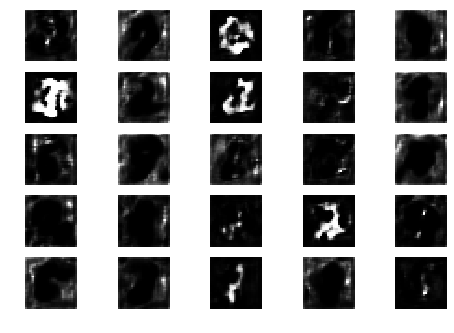

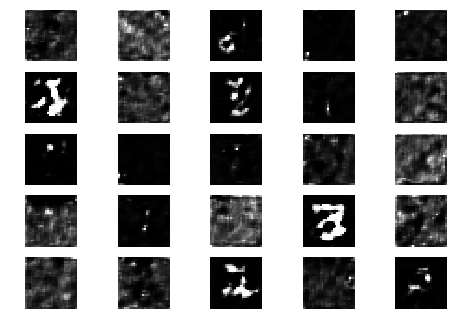

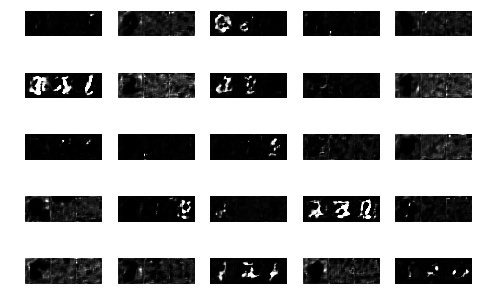

Epoch 0 Batch 1001/1875 [D loss: 1.216511, acc.: 40.62%] [G loss: 1.125229]
Epoch 0 Batch 1002/1875 [D loss: 0.834928, acc.: 56.25%] [G loss: 1.049784]
Epoch 0 Batch 1003/1875 [D loss: 0.539293, acc.: 71.88%] [G loss: 1.117859]
Epoch 0 Batch 1004/1875 [D loss: 0.758142, acc.: 56.25%] [G loss: 1.346242]
Epoch 0 Batch 1005/1875 [D loss: 0.595817, acc.: 81.25%] [G loss: 1.351358]
Epoch 0 Batch 1006/1875 [D loss: 0.569787, acc.: 68.75%] [G loss: 1.432199]
Epoch 0 Batch 1007/1875 [D loss: 0.697084, acc.: 46.88%] [G loss: 1.588758]
Epoch 0 Batch 1008/1875 [D loss: 0.751009, acc.: 53.12%] [G loss: 1.294628]
Epoch 0 Batch 1009/1875 [D loss: 0.804561, acc.: 53.12%] [G loss: 0.828184]
Epoch 0 Batch 1010/1875 [D loss: 0.529508, acc.: 68.75%] [G loss: 1.212332]
Epoch 0 Batch 1011/1875 [D loss: 0.715920, acc.: 53.12%] [G loss: 1.435276]
Epoch 0 Batch 1012/1875 [D loss: 0.839104, acc.: 37.50%] [G loss: 1.070205]
Epoch 0 Batch 1013/1875 [D loss: 0.501662, acc.: 71.88%] [G loss: 1.569761]
Epoch 0 Batc

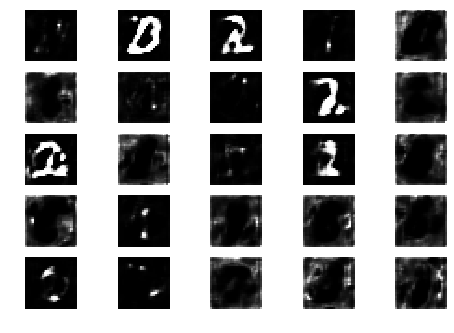

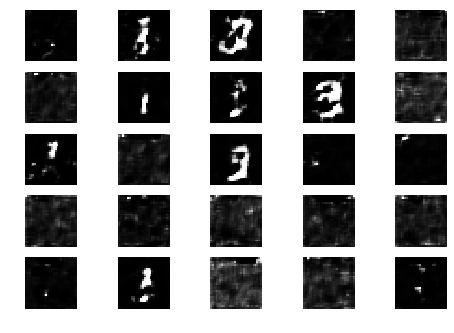

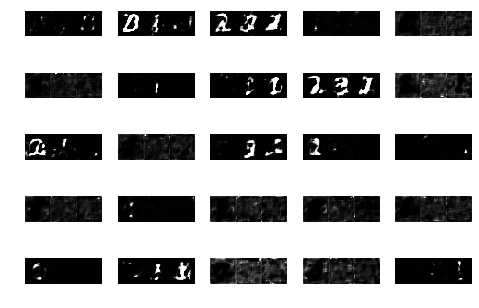

Epoch 0 Batch 1101/1875 [D loss: 0.599661, acc.: 68.75%] [G loss: 1.285208]
Epoch 0 Batch 1102/1875 [D loss: 0.507577, acc.: 71.88%] [G loss: 1.106534]
Epoch 0 Batch 1103/1875 [D loss: 0.499729, acc.: 71.88%] [G loss: 0.751537]
Epoch 0 Batch 1104/1875 [D loss: 0.906148, acc.: 40.62%] [G loss: 1.248594]
Epoch 0 Batch 1105/1875 [D loss: 0.490680, acc.: 78.12%] [G loss: 1.018505]
Epoch 0 Batch 1106/1875 [D loss: 0.484462, acc.: 71.88%] [G loss: 1.373896]
Epoch 0 Batch 1107/1875 [D loss: 0.602829, acc.: 59.38%] [G loss: 0.990178]
Epoch 0 Batch 1108/1875 [D loss: 0.599818, acc.: 68.75%] [G loss: 1.471517]
Epoch 0 Batch 1109/1875 [D loss: 0.461817, acc.: 87.50%] [G loss: 1.308452]
Epoch 0 Batch 1110/1875 [D loss: 0.621843, acc.: 59.38%] [G loss: 1.633347]
Epoch 0 Batch 1111/1875 [D loss: 0.552632, acc.: 75.00%] [G loss: 1.544940]
Epoch 0 Batch 1112/1875 [D loss: 0.655621, acc.: 59.38%] [G loss: 2.098592]
Epoch 0 Batch 1113/1875 [D loss: 0.653075, acc.: 59.38%] [G loss: 1.011434]
Epoch 0 Batc

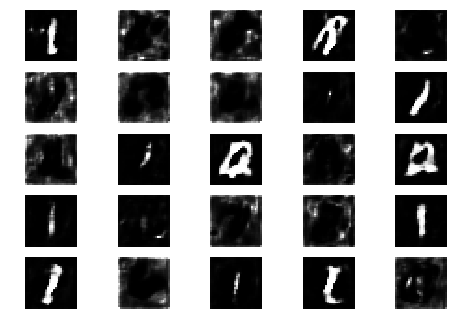

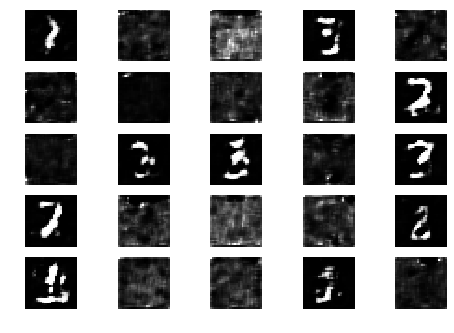

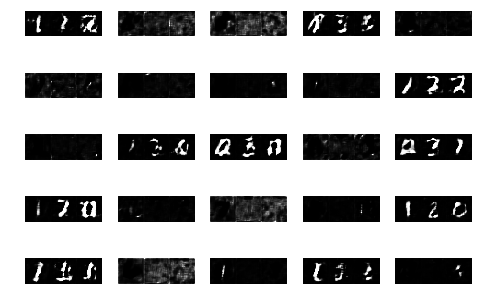

Epoch 0 Batch 1201/1875 [D loss: 0.782642, acc.: 43.75%] [G loss: 1.226534]
Epoch 0 Batch 1202/1875 [D loss: 0.636026, acc.: 68.75%] [G loss: 1.320491]
Epoch 0 Batch 1203/1875 [D loss: 0.712128, acc.: 43.75%] [G loss: 1.134944]
Epoch 0 Batch 1204/1875 [D loss: 1.061681, acc.: 31.25%] [G loss: 1.024219]
Epoch 0 Batch 1205/1875 [D loss: 0.614872, acc.: 68.75%] [G loss: 1.279284]
Epoch 0 Batch 1206/1875 [D loss: 0.748934, acc.: 50.00%] [G loss: 1.196632]
Epoch 0 Batch 1207/1875 [D loss: 0.384882, acc.: 90.62%] [G loss: 1.309342]
Epoch 0 Batch 1208/1875 [D loss: 0.327456, acc.: 84.38%] [G loss: 1.428107]
Epoch 0 Batch 1209/1875 [D loss: 0.482958, acc.: 78.12%] [G loss: 1.348854]
Epoch 0 Batch 1210/1875 [D loss: 0.914366, acc.: 40.62%] [G loss: 1.175407]
Epoch 0 Batch 1211/1875 [D loss: 1.010085, acc.: 37.50%] [G loss: 1.111237]
Epoch 0 Batch 1212/1875 [D loss: 0.732791, acc.: 62.50%] [G loss: 1.240949]
Epoch 0 Batch 1213/1875 [D loss: 0.533797, acc.: 75.00%] [G loss: 1.296670]
Epoch 0 Batc

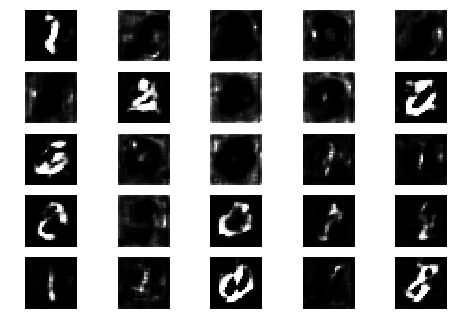

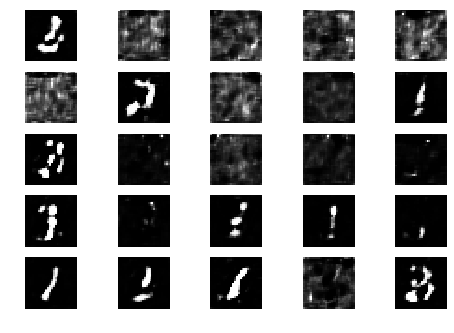

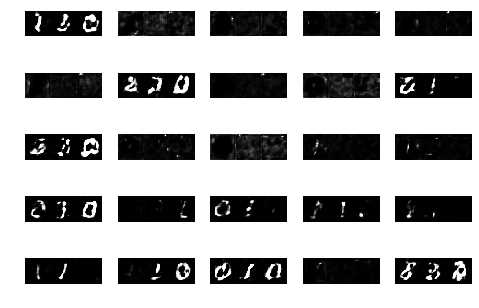

Epoch 0 Batch 1301/1875 [D loss: 0.792796, acc.: 50.00%] [G loss: 1.678695]
Epoch 0 Batch 1302/1875 [D loss: 0.737121, acc.: 65.62%] [G loss: 1.354364]
Epoch 0 Batch 1303/1875 [D loss: 0.624410, acc.: 68.75%] [G loss: 1.344415]
Epoch 0 Batch 1304/1875 [D loss: 0.516633, acc.: 75.00%] [G loss: 0.945471]
Epoch 0 Batch 1305/1875 [D loss: 0.979610, acc.: 43.75%] [G loss: 1.356489]
Epoch 0 Batch 1306/1875 [D loss: 0.651183, acc.: 59.38%] [G loss: 1.518137]
Epoch 0 Batch 1307/1875 [D loss: 0.622158, acc.: 53.12%] [G loss: 1.567672]
Epoch 0 Batch 1308/1875 [D loss: 0.563242, acc.: 65.62%] [G loss: 1.249298]
Epoch 0 Batch 1309/1875 [D loss: 0.650224, acc.: 59.38%] [G loss: 1.320467]
Epoch 0 Batch 1310/1875 [D loss: 0.578228, acc.: 62.50%] [G loss: 2.012045]
Epoch 0 Batch 1311/1875 [D loss: 0.738547, acc.: 68.75%] [G loss: 1.150452]
Epoch 0 Batch 1312/1875 [D loss: 0.599709, acc.: 71.88%] [G loss: 1.133332]
Epoch 0 Batch 1313/1875 [D loss: 0.789348, acc.: 50.00%] [G loss: 1.733701]
Epoch 0 Batc

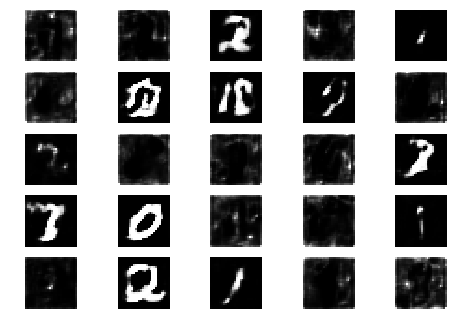

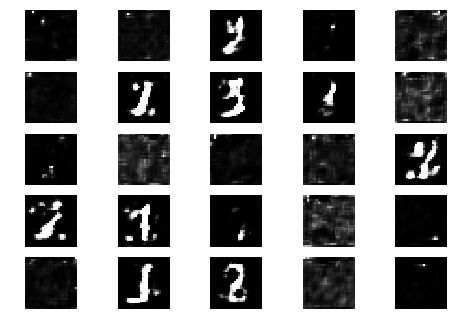

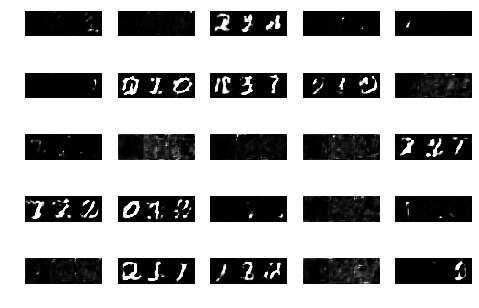

Epoch 0 Batch 1401/1875 [D loss: 0.518543, acc.: 75.00%] [G loss: 1.423155]
Epoch 0 Batch 1402/1875 [D loss: 0.666739, acc.: 59.38%] [G loss: 1.567407]
Epoch 0 Batch 1403/1875 [D loss: 0.338323, acc.: 90.62%] [G loss: 1.570370]
Epoch 0 Batch 1404/1875 [D loss: 0.641282, acc.: 71.88%] [G loss: 1.160177]
Epoch 0 Batch 1405/1875 [D loss: 0.694677, acc.: 53.12%] [G loss: 2.071616]
Epoch 0 Batch 1406/1875 [D loss: 0.622343, acc.: 59.38%] [G loss: 1.438608]
Epoch 0 Batch 1407/1875 [D loss: 0.498780, acc.: 75.00%] [G loss: 1.607122]
Epoch 0 Batch 1408/1875 [D loss: 0.663099, acc.: 59.38%] [G loss: 2.213761]
Epoch 0 Batch 1409/1875 [D loss: 0.603920, acc.: 59.38%] [G loss: 1.667356]
Epoch 0 Batch 1410/1875 [D loss: 0.615881, acc.: 65.62%] [G loss: 2.178497]
Epoch 0 Batch 1411/1875 [D loss: 0.457776, acc.: 75.00%] [G loss: 1.407616]
Epoch 0 Batch 1412/1875 [D loss: 0.649675, acc.: 59.38%] [G loss: 1.359031]
Epoch 0 Batch 1413/1875 [D loss: 0.659229, acc.: 68.75%] [G loss: 1.454253]
Epoch 0 Batc

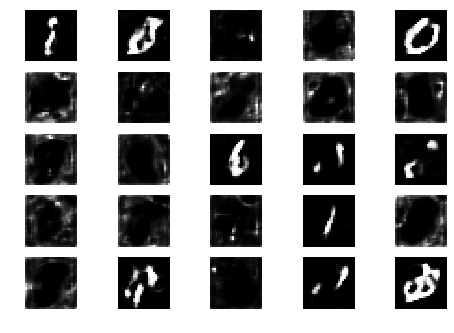

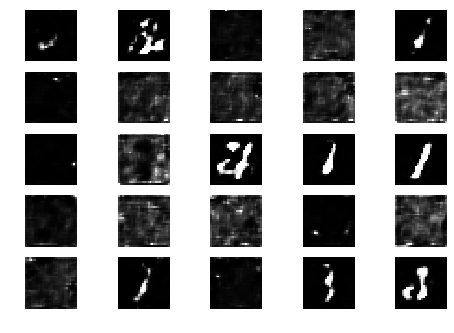

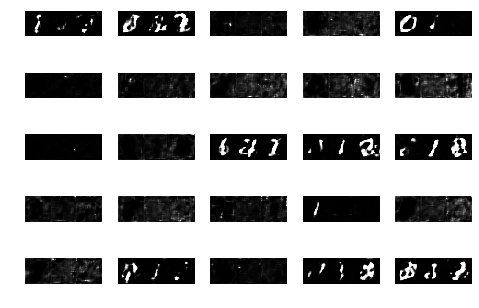

Epoch 0 Batch 1501/1875 [D loss: 0.594333, acc.: 65.62%] [G loss: 1.127898]
Epoch 0 Batch 1502/1875 [D loss: 0.556152, acc.: 68.75%] [G loss: 1.427703]
Epoch 0 Batch 1503/1875 [D loss: 0.593540, acc.: 68.75%] [G loss: 1.575638]
Epoch 0 Batch 1504/1875 [D loss: 0.583161, acc.: 71.88%] [G loss: 1.389689]
Epoch 0 Batch 1505/1875 [D loss: 1.136005, acc.: 18.75%] [G loss: 1.071948]
Epoch 0 Batch 1506/1875 [D loss: 0.628635, acc.: 62.50%] [G loss: 1.523748]
Epoch 0 Batch 1507/1875 [D loss: 0.681948, acc.: 65.62%] [G loss: 1.686558]
Epoch 0 Batch 1508/1875 [D loss: 0.587537, acc.: 59.38%] [G loss: 1.637270]
Epoch 0 Batch 1509/1875 [D loss: 0.832334, acc.: 40.62%] [G loss: 1.961654]
Epoch 0 Batch 1510/1875 [D loss: 0.483970, acc.: 75.00%] [G loss: 1.074457]
Epoch 0 Batch 1511/1875 [D loss: 0.435962, acc.: 81.25%] [G loss: 1.342792]
Epoch 0 Batch 1512/1875 [D loss: 0.651747, acc.: 65.62%] [G loss: 1.319674]
Epoch 0 Batch 1513/1875 [D loss: 0.428215, acc.: 84.38%] [G loss: 1.248666]
Epoch 0 Batc

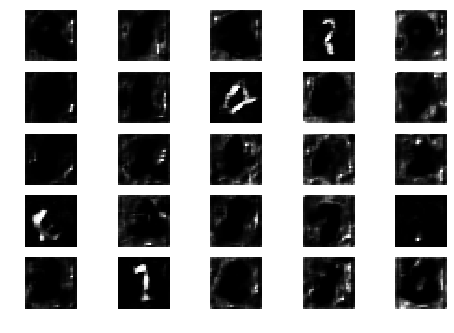

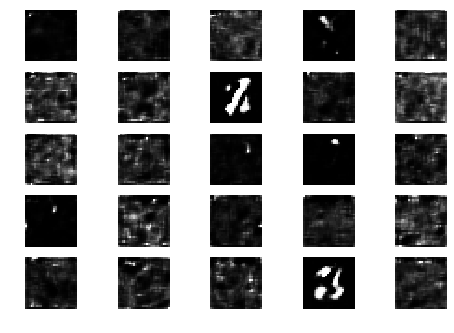

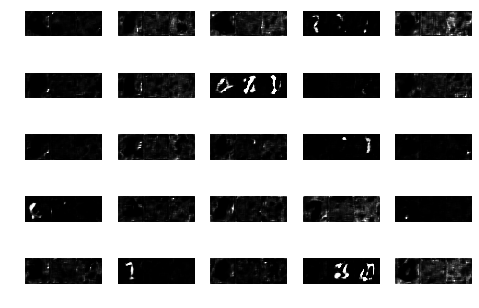

Epoch 0 Batch 1601/1875 [D loss: 0.806752, acc.: 46.88%] [G loss: 1.400739]
Epoch 0 Batch 1602/1875 [D loss: 0.644236, acc.: 71.88%] [G loss: 1.336146]
Epoch 0 Batch 1603/1875 [D loss: 0.632576, acc.: 81.25%] [G loss: 1.243828]
Epoch 0 Batch 1604/1875 [D loss: 0.363156, acc.: 93.75%] [G loss: 1.967204]
Epoch 0 Batch 1605/1875 [D loss: 0.947820, acc.: 46.88%] [G loss: 1.615662]
Epoch 0 Batch 1606/1875 [D loss: 0.868581, acc.: 50.00%] [G loss: 1.285977]
Epoch 0 Batch 1607/1875 [D loss: 0.344170, acc.: 93.75%] [G loss: 1.770200]
Epoch 0 Batch 1608/1875 [D loss: 0.446456, acc.: 81.25%] [G loss: 2.107029]
Epoch 0 Batch 1609/1875 [D loss: 0.715106, acc.: 59.38%] [G loss: 2.038253]
Epoch 0 Batch 1610/1875 [D loss: 0.421123, acc.: 81.25%] [G loss: 1.572072]
Epoch 0 Batch 1611/1875 [D loss: 0.649012, acc.: 68.75%] [G loss: 1.547313]
Epoch 0 Batch 1612/1875 [D loss: 0.820275, acc.: 43.75%] [G loss: 1.792699]
Epoch 0 Batch 1613/1875 [D loss: 0.434729, acc.: 81.25%] [G loss: 1.589098]
Epoch 0 Batc

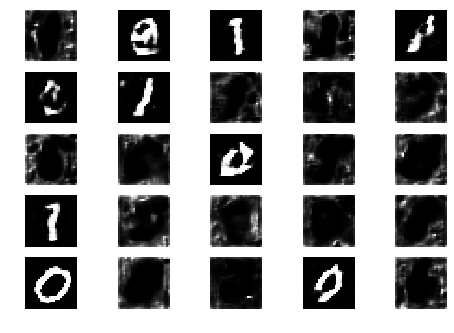

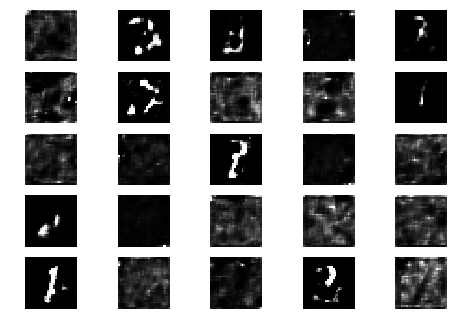

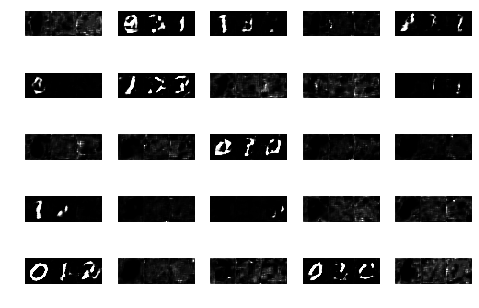

Epoch 0 Batch 1701/1875 [D loss: 0.727938, acc.: 59.38%] [G loss: 1.319754]
Epoch 0 Batch 1702/1875 [D loss: 0.389984, acc.: 81.25%] [G loss: 1.335553]
Epoch 0 Batch 1703/1875 [D loss: 0.843467, acc.: 40.62%] [G loss: 1.821762]
Epoch 0 Batch 1704/1875 [D loss: 0.511358, acc.: 78.12%] [G loss: 1.550061]
Epoch 0 Batch 1705/1875 [D loss: 0.585827, acc.: 68.75%] [G loss: 1.367556]
Epoch 0 Batch 1706/1875 [D loss: 0.809100, acc.: 43.75%] [G loss: 1.464960]
Epoch 0 Batch 1707/1875 [D loss: 0.810929, acc.: 62.50%] [G loss: 0.866386]
Epoch 0 Batch 1708/1875 [D loss: 0.819435, acc.: 75.00%] [G loss: 1.418833]
Epoch 0 Batch 1709/1875 [D loss: 0.316217, acc.: 84.38%] [G loss: 1.999229]
Epoch 0 Batch 1710/1875 [D loss: 0.655388, acc.: 62.50%] [G loss: 1.376263]
Epoch 0 Batch 1711/1875 [D loss: 0.656721, acc.: 71.88%] [G loss: 1.245633]
Epoch 0 Batch 1712/1875 [D loss: 0.652980, acc.: 68.75%] [G loss: 1.278464]
Epoch 0 Batch 1713/1875 [D loss: 0.496093, acc.: 78.12%] [G loss: 1.254079]
Epoch 0 Batc

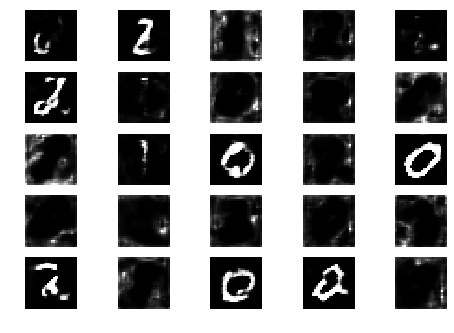

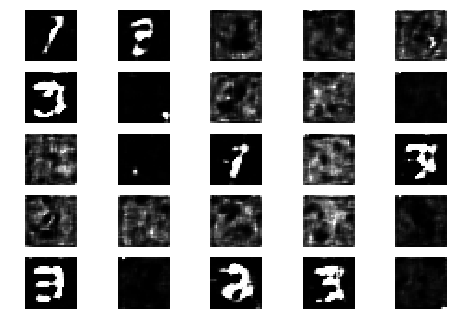

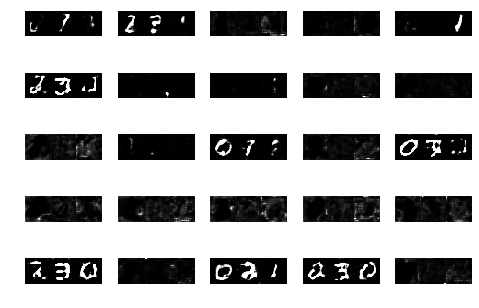

Epoch 0 Batch 1801/1875 [D loss: 0.704235, acc.: 50.00%] [G loss: 1.385161]
Epoch 0 Batch 1802/1875 [D loss: 0.421219, acc.: 81.25%] [G loss: 1.227360]
Epoch 0 Batch 1803/1875 [D loss: 0.502615, acc.: 71.88%] [G loss: 1.226841]
Epoch 0 Batch 1804/1875 [D loss: 0.606533, acc.: 62.50%] [G loss: 1.315111]
Epoch 0 Batch 1805/1875 [D loss: 0.639670, acc.: 62.50%] [G loss: 1.120655]
Epoch 0 Batch 1806/1875 [D loss: 0.566935, acc.: 68.75%] [G loss: 1.331474]
Epoch 0 Batch 1807/1875 [D loss: 0.538327, acc.: 78.12%] [G loss: 1.456978]
Epoch 0 Batch 1808/1875 [D loss: 0.629942, acc.: 62.50%] [G loss: 2.269131]
Epoch 0 Batch 1809/1875 [D loss: 0.600634, acc.: 68.75%] [G loss: 1.608726]
Epoch 0 Batch 1810/1875 [D loss: 0.869506, acc.: 50.00%] [G loss: 1.043711]
Epoch 0 Batch 1811/1875 [D loss: 0.566171, acc.: 84.38%] [G loss: 1.165689]
Epoch 0 Batch 1812/1875 [D loss: 0.475064, acc.: 81.25%] [G loss: 1.439883]
Epoch 0 Batch 1813/1875 [D loss: 0.651643, acc.: 56.25%] [G loss: 1.697559]
Epoch 0 Batc

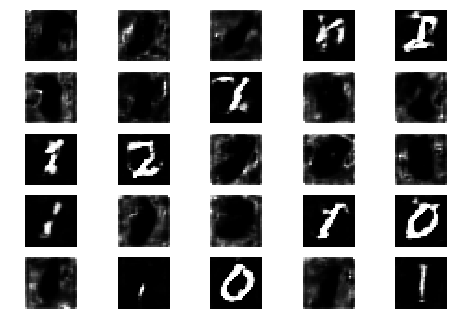

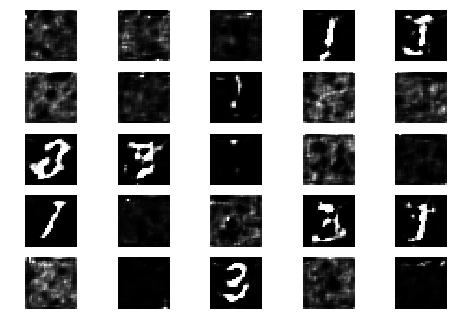

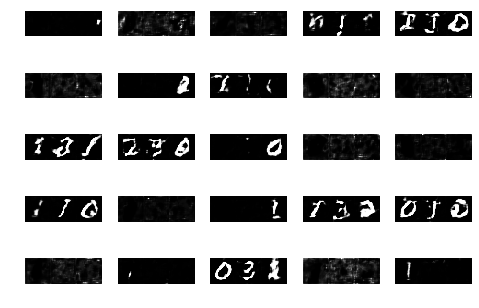

Epoch 1 Batch 1/1875 [D loss: 0.350976, acc.: 84.38%] [G loss: 1.514896]
Epoch 1 Batch 2/1875 [D loss: 0.548582, acc.: 75.00%] [G loss: 1.615814]
Epoch 1 Batch 3/1875 [D loss: 0.658863, acc.: 59.38%] [G loss: 2.200098]
Epoch 1 Batch 4/1875 [D loss: 0.642043, acc.: 75.00%] [G loss: 1.712907]
Epoch 1 Batch 5/1875 [D loss: 0.897241, acc.: 75.00%] [G loss: 1.759393]
Epoch 1 Batch 6/1875 [D loss: 0.475689, acc.: 84.38%] [G loss: 2.085578]
Epoch 1 Batch 7/1875 [D loss: 0.742221, acc.: 50.00%] [G loss: 1.234896]
Epoch 1 Batch 8/1875 [D loss: 0.858780, acc.: 53.12%] [G loss: 1.207987]
Epoch 1 Batch 9/1875 [D loss: 0.628097, acc.: 50.00%] [G loss: 1.171668]
Epoch 1 Batch 10/1875 [D loss: 0.419165, acc.: 90.62%] [G loss: 1.323579]
Epoch 1 Batch 11/1875 [D loss: 0.201850, acc.: 100.00%] [G loss: 1.883144]
Epoch 1 Batch 12/1875 [D loss: 0.392043, acc.: 81.25%] [G loss: 1.559368]
Epoch 1 Batch 13/1875 [D loss: 0.712674, acc.: 65.62%] [G loss: 1.962994]
Epoch 1 Batch 14/1875 [D loss: 0.232625, acc.:

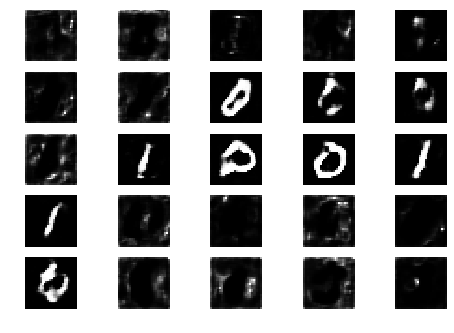

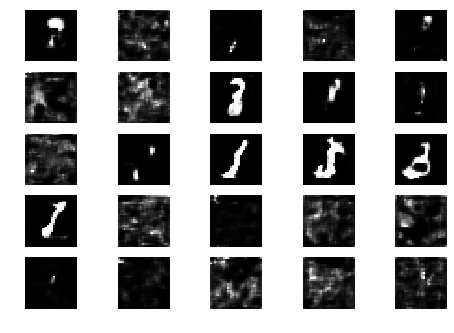

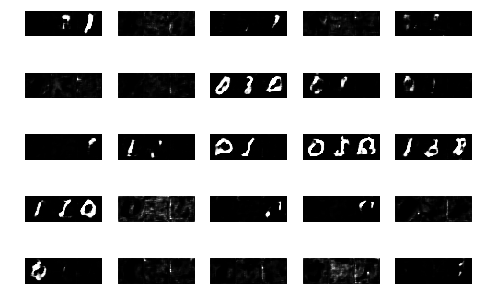

Epoch 1 Batch 101/1875 [D loss: 0.661314, acc.: 71.88%] [G loss: 1.767009]
Epoch 1 Batch 102/1875 [D loss: 0.713362, acc.: 46.88%] [G loss: 1.772145]
Epoch 1 Batch 103/1875 [D loss: 0.677670, acc.: 68.75%] [G loss: 1.581856]
Epoch 1 Batch 104/1875 [D loss: 0.925563, acc.: 31.25%] [G loss: 2.045266]
Epoch 1 Batch 105/1875 [D loss: 1.151497, acc.: 43.75%] [G loss: 2.059215]
Epoch 1 Batch 106/1875 [D loss: 0.680168, acc.: 65.62%] [G loss: 1.705328]
Epoch 1 Batch 107/1875 [D loss: 0.503658, acc.: 68.75%] [G loss: 2.056520]
Epoch 1 Batch 108/1875 [D loss: 0.611273, acc.: 68.75%] [G loss: 2.039410]
Epoch 1 Batch 109/1875 [D loss: 0.465649, acc.: 84.38%] [G loss: 1.536674]
Epoch 1 Batch 110/1875 [D loss: 0.574623, acc.: 78.12%] [G loss: 1.717819]
Epoch 1 Batch 111/1875 [D loss: 0.577257, acc.: 65.62%] [G loss: 1.563089]
Epoch 1 Batch 112/1875 [D loss: 0.407979, acc.: 75.00%] [G loss: 2.471964]
Epoch 1 Batch 113/1875 [D loss: 0.612490, acc.: 59.38%] [G loss: 2.485702]
Epoch 1 Batch 114/1875 [D

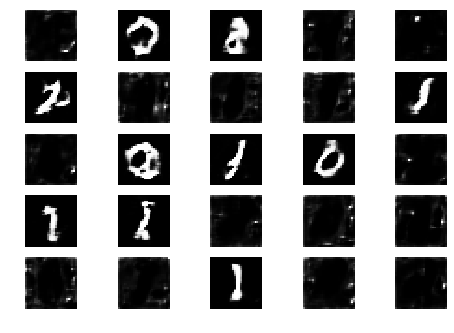

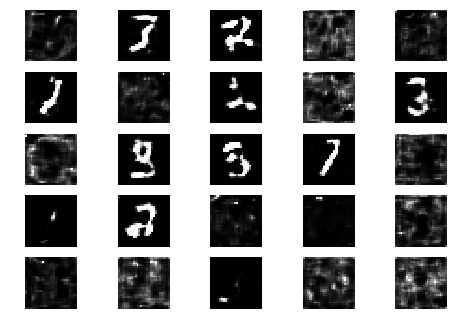

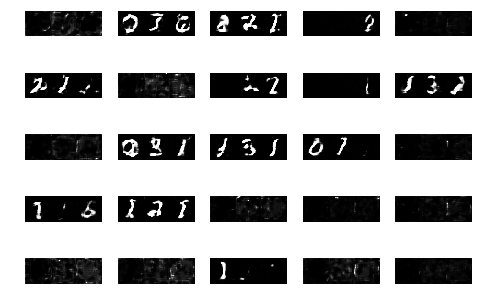

Epoch 1 Batch 201/1875 [D loss: 0.666967, acc.: 53.12%] [G loss: 1.546383]
Epoch 1 Batch 202/1875 [D loss: 0.773453, acc.: 59.38%] [G loss: 1.209051]
Epoch 1 Batch 203/1875 [D loss: 0.753405, acc.: 53.12%] [G loss: 1.230927]
Epoch 1 Batch 204/1875 [D loss: 0.469856, acc.: 71.88%] [G loss: 2.481269]
Epoch 1 Batch 205/1875 [D loss: 0.399125, acc.: 84.38%] [G loss: 1.766033]
Epoch 1 Batch 206/1875 [D loss: 0.664133, acc.: 71.88%] [G loss: 1.950217]
Epoch 1 Batch 207/1875 [D loss: 0.855714, acc.: 50.00%] [G loss: 1.413399]
Epoch 1 Batch 208/1875 [D loss: 0.236820, acc.: 93.75%] [G loss: 1.342028]
Epoch 1 Batch 209/1875 [D loss: 0.858746, acc.: 59.38%] [G loss: 1.889666]
Epoch 1 Batch 210/1875 [D loss: 0.787346, acc.: 43.75%] [G loss: 1.701534]
Epoch 1 Batch 211/1875 [D loss: 0.663151, acc.: 59.38%] [G loss: 1.754925]
Epoch 1 Batch 212/1875 [D loss: 0.722954, acc.: 53.12%] [G loss: 1.530148]
Epoch 1 Batch 213/1875 [D loss: 0.496603, acc.: 87.50%] [G loss: 1.528557]
Epoch 1 Batch 214/1875 [D

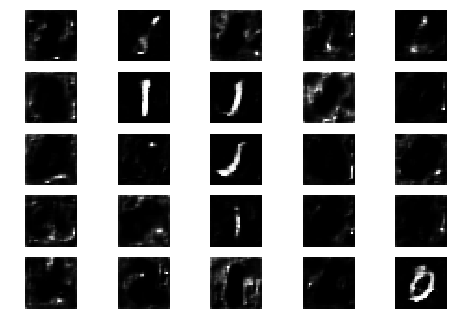

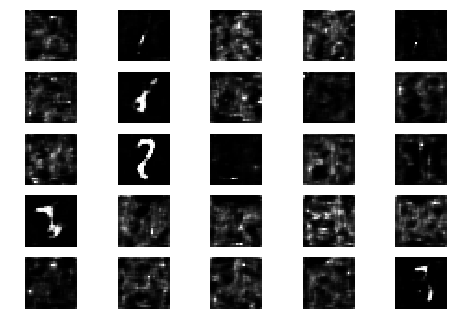

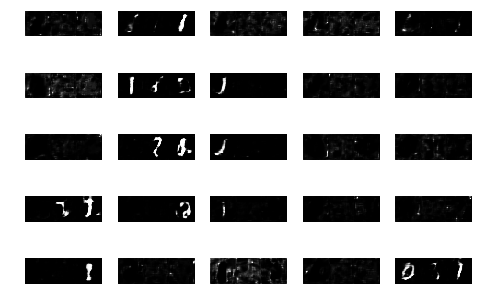

Epoch 1 Batch 301/1875 [D loss: 1.356822, acc.: 50.00%] [G loss: 1.080210]
Epoch 1 Batch 302/1875 [D loss: 0.659538, acc.: 65.62%] [G loss: 1.390964]
Epoch 1 Batch 303/1875 [D loss: 0.381130, acc.: 81.25%] [G loss: 1.467268]
Epoch 1 Batch 304/1875 [D loss: 0.200553, acc.: 100.00%] [G loss: 1.874442]
Epoch 1 Batch 305/1875 [D loss: 0.667595, acc.: 62.50%] [G loss: 1.524820]
Epoch 1 Batch 306/1875 [D loss: 0.522200, acc.: 71.88%] [G loss: 1.738054]
Epoch 1 Batch 307/1875 [D loss: 0.616672, acc.: 71.88%] [G loss: 1.795761]
Epoch 1 Batch 308/1875 [D loss: 0.512598, acc.: 75.00%] [G loss: 1.962617]
Epoch 1 Batch 309/1875 [D loss: 0.305276, acc.: 84.38%] [G loss: 1.730392]
Epoch 1 Batch 310/1875 [D loss: 0.800575, acc.: 53.12%] [G loss: 1.984751]
Epoch 1 Batch 311/1875 [D loss: 0.722635, acc.: 62.50%] [G loss: 1.378815]
Epoch 1 Batch 312/1875 [D loss: 0.706961, acc.: 53.12%] [G loss: 2.128702]
Epoch 1 Batch 313/1875 [D loss: 0.457291, acc.: 78.12%] [G loss: 2.554999]
Epoch 1 Batch 314/1875 [

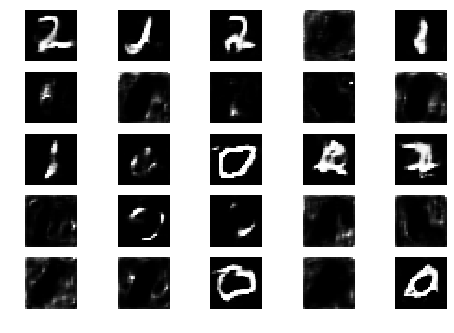

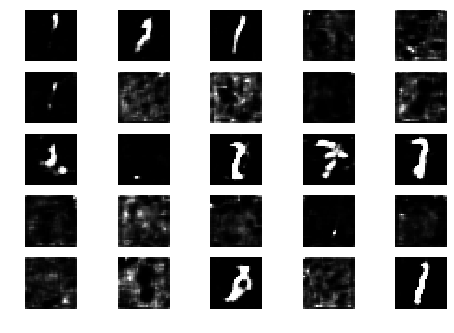

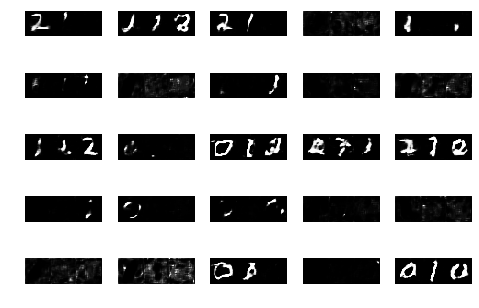

Epoch 1 Batch 401/1875 [D loss: 0.370437, acc.: 87.50%] [G loss: 2.025697]
Epoch 1 Batch 402/1875 [D loss: 0.604261, acc.: 59.38%] [G loss: 1.314704]
Epoch 1 Batch 403/1875 [D loss: 0.760350, acc.: 53.12%] [G loss: 2.208964]
Epoch 1 Batch 404/1875 [D loss: 0.679413, acc.: 56.25%] [G loss: 2.055343]
Epoch 1 Batch 405/1875 [D loss: 0.384726, acc.: 93.75%] [G loss: 2.813550]
Epoch 1 Batch 406/1875 [D loss: 0.587714, acc.: 68.75%] [G loss: 2.010122]
Epoch 1 Batch 407/1875 [D loss: 0.378771, acc.: 87.50%] [G loss: 2.372187]
Epoch 1 Batch 408/1875 [D loss: 0.662872, acc.: 59.38%] [G loss: 1.981350]
Epoch 1 Batch 409/1875 [D loss: 0.335132, acc.: 81.25%] [G loss: 1.964802]
Epoch 1 Batch 410/1875 [D loss: 0.483340, acc.: 71.88%] [G loss: 2.309141]
Epoch 1 Batch 411/1875 [D loss: 0.253868, acc.: 90.62%] [G loss: 1.443085]
Epoch 1 Batch 412/1875 [D loss: 0.924706, acc.: 46.88%] [G loss: 1.167291]
Epoch 1 Batch 413/1875 [D loss: 0.728917, acc.: 65.62%] [G loss: 1.908852]
Epoch 1 Batch 414/1875 [D

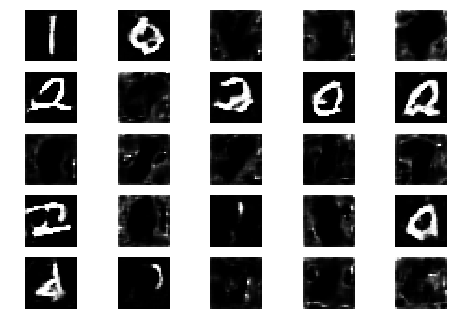

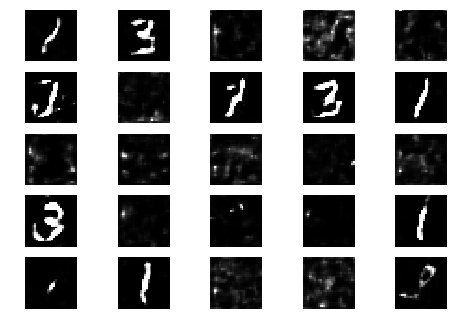

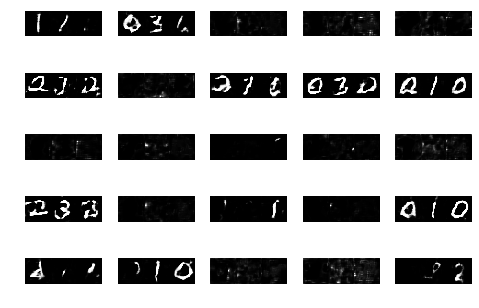

Epoch 1 Batch 501/1875 [D loss: 0.362831, acc.: 87.50%] [G loss: 1.583778]
Epoch 1 Batch 502/1875 [D loss: 0.531037, acc.: 81.25%] [G loss: 1.685698]
Epoch 1 Batch 503/1875 [D loss: 0.599526, acc.: 65.62%] [G loss: 1.058880]
Epoch 1 Batch 504/1875 [D loss: 0.598644, acc.: 65.62%] [G loss: 2.455694]
Epoch 1 Batch 505/1875 [D loss: 0.503553, acc.: 68.75%] [G loss: 1.646474]
Epoch 1 Batch 506/1875 [D loss: 0.495392, acc.: 75.00%] [G loss: 2.672036]
Epoch 1 Batch 507/1875 [D loss: 0.483696, acc.: 78.12%] [G loss: 2.775904]
Epoch 1 Batch 508/1875 [D loss: 0.484447, acc.: 75.00%] [G loss: 2.549711]
Epoch 1 Batch 509/1875 [D loss: 0.808311, acc.: 56.25%] [G loss: 1.730211]
Epoch 1 Batch 510/1875 [D loss: 0.715622, acc.: 56.25%] [G loss: 1.354432]
Epoch 1 Batch 511/1875 [D loss: 0.447219, acc.: 81.25%] [G loss: 2.226867]
Epoch 1 Batch 512/1875 [D loss: 0.650778, acc.: 56.25%] [G loss: 1.253396]
Epoch 1 Batch 513/1875 [D loss: 0.786965, acc.: 43.75%] [G loss: 1.410521]
Epoch 1 Batch 514/1875 [D

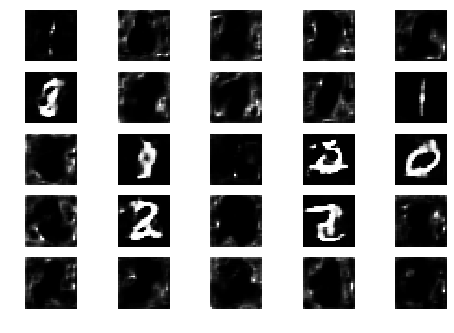

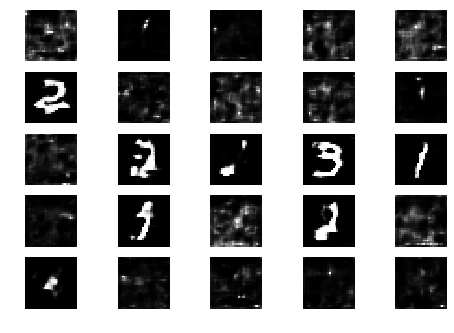

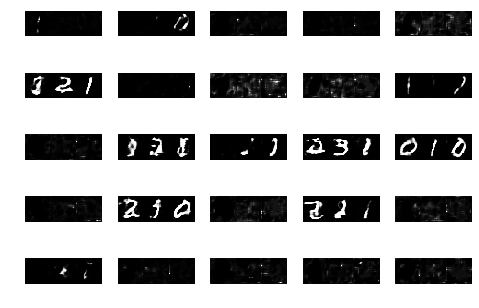

Epoch 1 Batch 601/1875 [D loss: 0.566300, acc.: 65.62%] [G loss: 1.382337]
Epoch 1 Batch 602/1875 [D loss: 0.364847, acc.: 84.38%] [G loss: 1.622470]
Epoch 1 Batch 603/1875 [D loss: 0.450252, acc.: 71.88%] [G loss: 1.878578]
Epoch 1 Batch 604/1875 [D loss: 0.586324, acc.: 78.12%] [G loss: 1.367503]
Epoch 1 Batch 605/1875 [D loss: 0.438451, acc.: 78.12%] [G loss: 1.816957]
Epoch 1 Batch 606/1875 [D loss: 0.611254, acc.: 68.75%] [G loss: 2.565837]
Epoch 1 Batch 607/1875 [D loss: 0.463835, acc.: 75.00%] [G loss: 1.721461]
Epoch 1 Batch 608/1875 [D loss: 0.503845, acc.: 75.00%] [G loss: 1.859396]
Epoch 1 Batch 609/1875 [D loss: 0.775813, acc.: 62.50%] [G loss: 2.088339]
Epoch 1 Batch 610/1875 [D loss: 0.464742, acc.: 81.25%] [G loss: 2.011431]
Epoch 1 Batch 611/1875 [D loss: 0.293258, acc.: 93.75%] [G loss: 2.396730]
Epoch 1 Batch 612/1875 [D loss: 0.740716, acc.: 59.38%] [G loss: 1.785885]
Epoch 1 Batch 613/1875 [D loss: 0.732641, acc.: 65.62%] [G loss: 2.302231]
Epoch 1 Batch 614/1875 [D

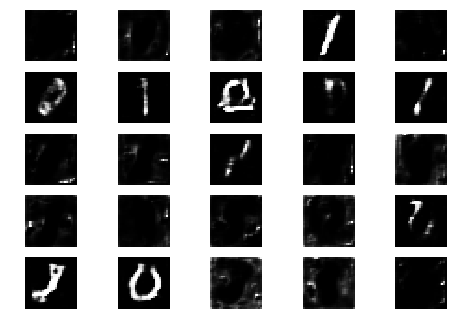

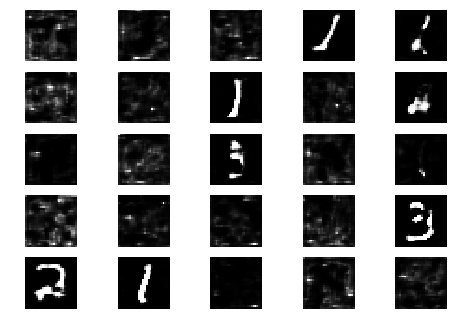

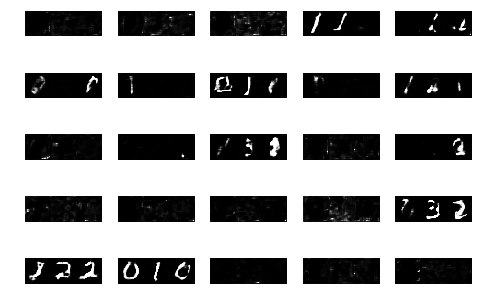

Epoch 1 Batch 701/1875 [D loss: 0.451156, acc.: 75.00%] [G loss: 1.394397]
Epoch 1 Batch 702/1875 [D loss: 0.501105, acc.: 81.25%] [G loss: 1.663436]
Epoch 1 Batch 703/1875 [D loss: 0.285004, acc.: 93.75%] [G loss: 1.616433]
Epoch 1 Batch 704/1875 [D loss: 0.244854, acc.: 93.75%] [G loss: 1.761376]
Epoch 1 Batch 705/1875 [D loss: 0.629589, acc.: 56.25%] [G loss: 1.553092]
Epoch 1 Batch 706/1875 [D loss: 0.558922, acc.: 75.00%] [G loss: 1.886499]
Epoch 1 Batch 707/1875 [D loss: 0.914264, acc.: 40.62%] [G loss: 1.792740]
Epoch 1 Batch 708/1875 [D loss: 0.476054, acc.: 75.00%] [G loss: 1.570701]
Epoch 1 Batch 709/1875 [D loss: 0.295782, acc.: 93.75%] [G loss: 1.666123]
Epoch 1 Batch 710/1875 [D loss: 0.977149, acc.: 34.38%] [G loss: 1.404244]
Epoch 1 Batch 711/1875 [D loss: 0.466666, acc.: 75.00%] [G loss: 1.393108]
Epoch 1 Batch 712/1875 [D loss: 0.560238, acc.: 71.88%] [G loss: 1.879057]
Epoch 1 Batch 713/1875 [D loss: 0.600528, acc.: 71.88%] [G loss: 1.681621]
Epoch 1 Batch 714/1875 [D

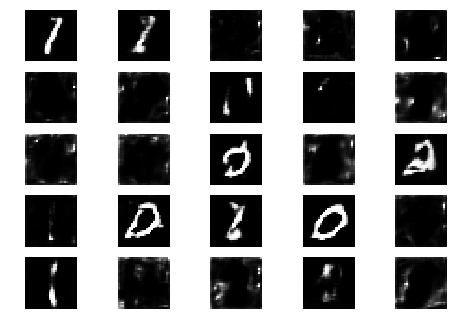

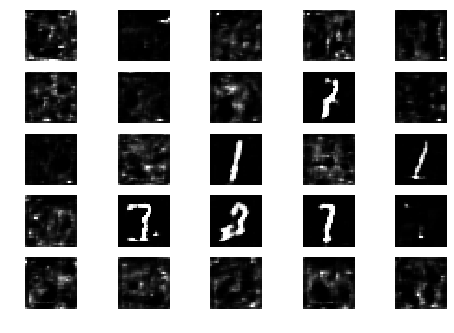

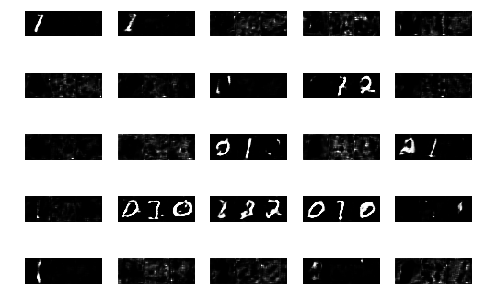

Epoch 1 Batch 801/1875 [D loss: 0.651509, acc.: 65.62%] [G loss: 2.018370]
Epoch 1 Batch 802/1875 [D loss: 0.540116, acc.: 68.75%] [G loss: 1.740658]
Epoch 1 Batch 803/1875 [D loss: 0.631496, acc.: 62.50%] [G loss: 1.673754]
Epoch 1 Batch 804/1875 [D loss: 0.515602, acc.: 68.75%] [G loss: 1.960838]
Epoch 1 Batch 805/1875 [D loss: 0.585471, acc.: 75.00%] [G loss: 2.012937]
Epoch 1 Batch 806/1875 [D loss: 0.439081, acc.: 81.25%] [G loss: 2.076712]
Epoch 1 Batch 807/1875 [D loss: 0.632658, acc.: 56.25%] [G loss: 1.338886]
Epoch 1 Batch 808/1875 [D loss: 0.561430, acc.: 68.75%] [G loss: 2.133745]
Epoch 1 Batch 809/1875 [D loss: 0.657019, acc.: 62.50%] [G loss: 1.636075]
Epoch 1 Batch 810/1875 [D loss: 0.426152, acc.: 87.50%] [G loss: 1.939957]
Epoch 1 Batch 811/1875 [D loss: 0.745294, acc.: 56.25%] [G loss: 1.935405]
Epoch 1 Batch 812/1875 [D loss: 0.886562, acc.: 31.25%] [G loss: 1.186005]
Epoch 1 Batch 813/1875 [D loss: 0.704655, acc.: 68.75%] [G loss: 2.047826]
Epoch 1 Batch 814/1875 [D

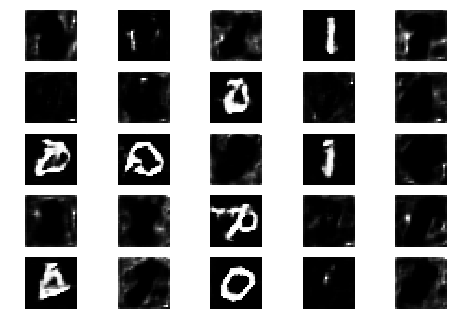

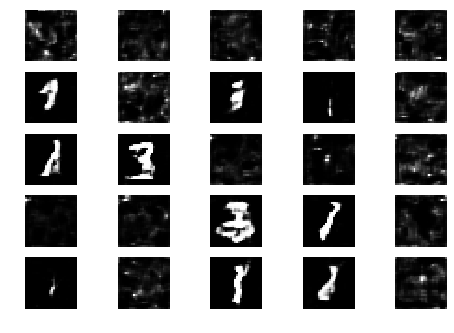

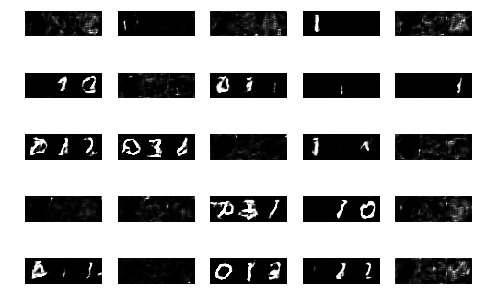

Epoch 1 Batch 901/1875 [D loss: 0.202066, acc.: 96.88%] [G loss: 1.119334]
Epoch 1 Batch 902/1875 [D loss: 0.390575, acc.: 87.50%] [G loss: 2.045739]
Epoch 1 Batch 903/1875 [D loss: 0.479197, acc.: 75.00%] [G loss: 3.465255]
Epoch 1 Batch 904/1875 [D loss: 0.644382, acc.: 68.75%] [G loss: 2.665830]
Epoch 1 Batch 905/1875 [D loss: 0.483427, acc.: 84.38%] [G loss: 2.027802]
Epoch 1 Batch 906/1875 [D loss: 0.417825, acc.: 84.38%] [G loss: 1.634403]
Epoch 1 Batch 907/1875 [D loss: 0.296897, acc.: 90.62%] [G loss: 1.687801]
Epoch 1 Batch 908/1875 [D loss: 0.412251, acc.: 84.38%] [G loss: 2.280685]
Epoch 1 Batch 909/1875 [D loss: 0.497745, acc.: 78.12%] [G loss: 2.571357]
Epoch 1 Batch 910/1875 [D loss: 0.439176, acc.: 75.00%] [G loss: 1.769564]
Epoch 1 Batch 911/1875 [D loss: 0.650828, acc.: 62.50%] [G loss: 1.726963]
Epoch 1 Batch 912/1875 [D loss: 0.804090, acc.: 53.12%] [G loss: 2.671211]
Epoch 1 Batch 913/1875 [D loss: 0.705279, acc.: 62.50%] [G loss: 2.185457]
Epoch 1 Batch 914/1875 [D

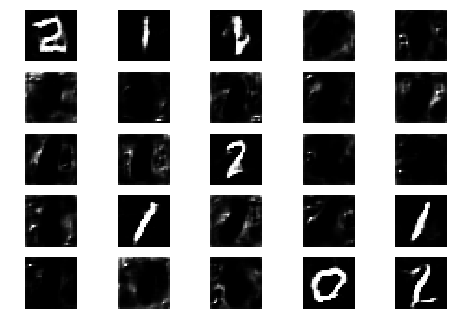

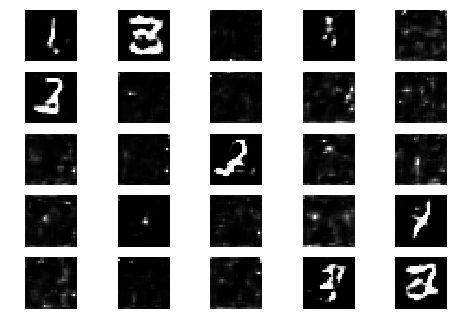

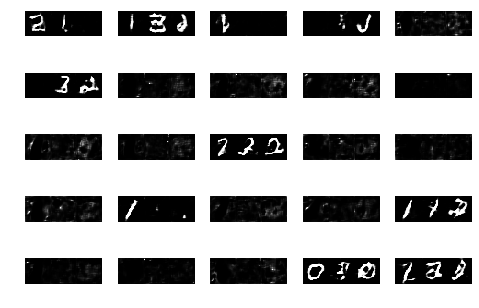

Epoch 1 Batch 1001/1875 [D loss: 0.291990, acc.: 90.62%] [G loss: 1.611144]
Epoch 1 Batch 1002/1875 [D loss: 0.551162, acc.: 65.62%] [G loss: 0.820521]
Epoch 1 Batch 1003/1875 [D loss: 0.452897, acc.: 78.12%] [G loss: 1.568459]
Epoch 1 Batch 1004/1875 [D loss: 1.075076, acc.: 37.50%] [G loss: 1.451875]
Epoch 1 Batch 1005/1875 [D loss: 0.483384, acc.: 81.25%] [G loss: 2.000494]
Epoch 1 Batch 1006/1875 [D loss: 0.675166, acc.: 56.25%] [G loss: 2.042001]
Epoch 1 Batch 1007/1875 [D loss: 0.322649, acc.: 90.62%] [G loss: 2.099246]
Epoch 1 Batch 1008/1875 [D loss: 0.356287, acc.: 87.50%] [G loss: 1.634280]
Epoch 1 Batch 1009/1875 [D loss: 0.595213, acc.: 62.50%] [G loss: 1.840391]
Epoch 1 Batch 1010/1875 [D loss: 0.413849, acc.: 93.75%] [G loss: 1.235831]
Epoch 1 Batch 1011/1875 [D loss: 0.624696, acc.: 71.88%] [G loss: 2.164400]
Epoch 1 Batch 1012/1875 [D loss: 0.357097, acc.: 87.50%] [G loss: 1.991817]
Epoch 1 Batch 1013/1875 [D loss: 0.535318, acc.: 71.88%] [G loss: 2.829138]
Epoch 1 Batc

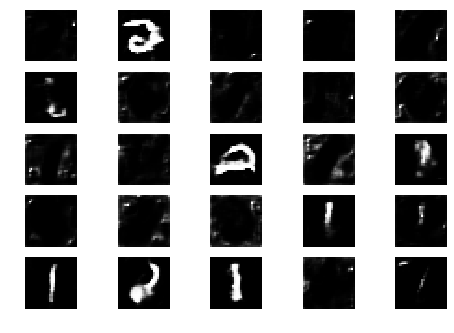

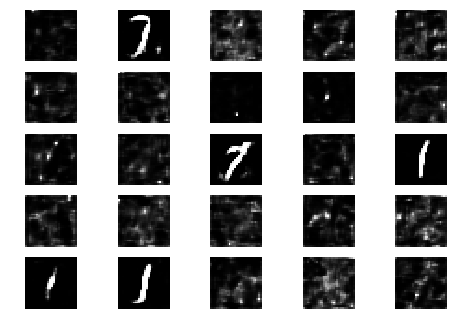

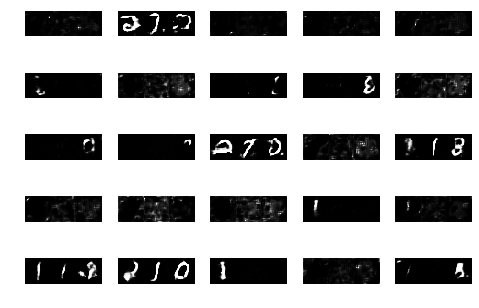

Epoch 1 Batch 1101/1875 [D loss: 1.176066, acc.: 31.25%] [G loss: 1.604143]
Epoch 1 Batch 1102/1875 [D loss: 0.464840, acc.: 75.00%] [G loss: 1.845730]
Epoch 1 Batch 1103/1875 [D loss: 0.802833, acc.: 46.88%] [G loss: 2.969307]
Epoch 1 Batch 1104/1875 [D loss: 0.512824, acc.: 78.12%] [G loss: 2.880129]
Epoch 1 Batch 1105/1875 [D loss: 0.709289, acc.: 62.50%] [G loss: 1.408895]
Epoch 1 Batch 1106/1875 [D loss: 0.865159, acc.: 56.25%] [G loss: 1.574354]
Epoch 1 Batch 1107/1875 [D loss: 0.627121, acc.: 59.38%] [G loss: 1.398371]
Epoch 1 Batch 1108/1875 [D loss: 0.697711, acc.: 53.12%] [G loss: 1.164956]
Epoch 1 Batch 1109/1875 [D loss: 0.327209, acc.: 93.75%] [G loss: 1.715680]
Epoch 1 Batch 1110/1875 [D loss: 0.639899, acc.: 68.75%] [G loss: 2.517810]
Epoch 1 Batch 1111/1875 [D loss: 0.472820, acc.: 81.25%] [G loss: 2.005415]
Epoch 1 Batch 1112/1875 [D loss: 0.370910, acc.: 90.62%] [G loss: 2.973579]
Epoch 1 Batch 1113/1875 [D loss: 0.263771, acc.: 96.88%] [G loss: 3.965769]
Epoch 1 Batc

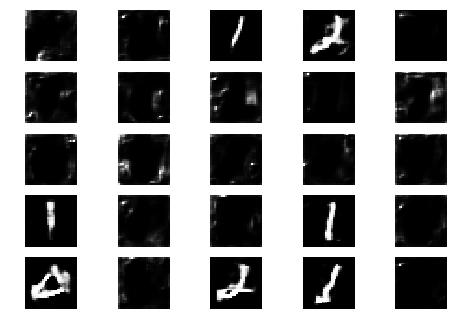

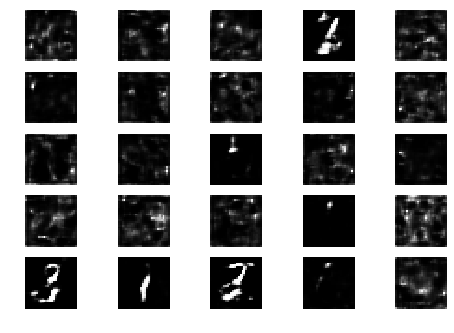

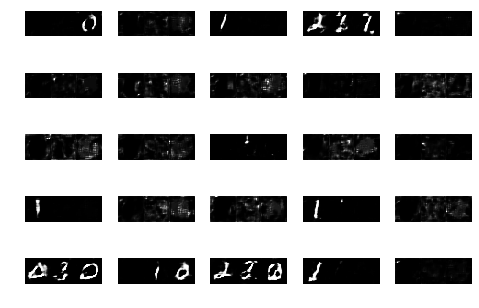

Epoch 1 Batch 1201/1875 [D loss: 0.358205, acc.: 84.38%] [G loss: 2.880173]
Epoch 1 Batch 1202/1875 [D loss: 0.352859, acc.: 87.50%] [G loss: 2.450229]
Epoch 1 Batch 1203/1875 [D loss: 0.892352, acc.: 37.50%] [G loss: 2.149301]
Epoch 1 Batch 1204/1875 [D loss: 0.373134, acc.: 84.38%] [G loss: 2.469785]
Epoch 1 Batch 1205/1875 [D loss: 0.512329, acc.: 71.88%] [G loss: 2.675461]
Epoch 1 Batch 1206/1875 [D loss: 0.595851, acc.: 71.88%] [G loss: 3.064938]
Epoch 1 Batch 1207/1875 [D loss: 0.722813, acc.: 71.88%] [G loss: 2.467735]
Epoch 1 Batch 1208/1875 [D loss: 0.914176, acc.: 46.88%] [G loss: 1.329608]
Epoch 1 Batch 1209/1875 [D loss: 0.398984, acc.: 87.50%] [G loss: 1.471125]
Epoch 1 Batch 1210/1875 [D loss: 0.618080, acc.: 71.88%] [G loss: 1.483529]
Epoch 1 Batch 1211/1875 [D loss: 0.713948, acc.: 62.50%] [G loss: 2.341272]
Epoch 1 Batch 1212/1875 [D loss: 0.383643, acc.: 81.25%] [G loss: 1.723686]
Epoch 1 Batch 1213/1875 [D loss: 0.579582, acc.: 68.75%] [G loss: 2.254780]
Epoch 1 Batc

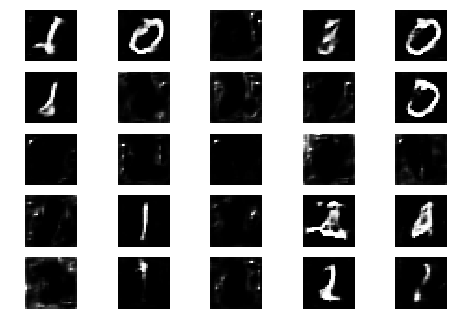

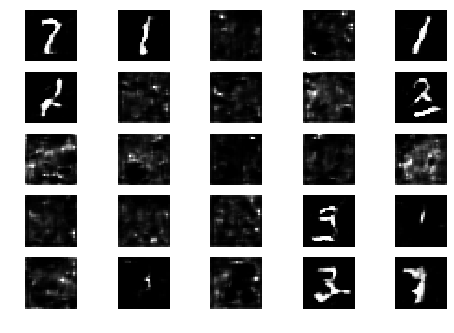

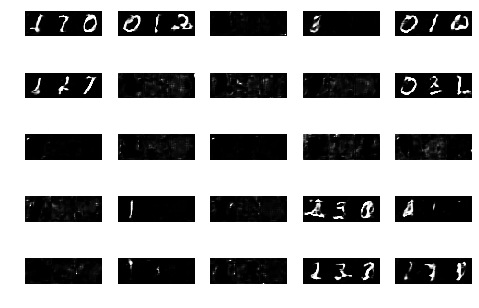

Epoch 1 Batch 1301/1875 [D loss: 0.177083, acc.: 96.88%] [G loss: 2.376674]
Epoch 1 Batch 1302/1875 [D loss: 0.582215, acc.: 71.88%] [G loss: 1.569140]
Epoch 1 Batch 1303/1875 [D loss: 0.450494, acc.: 75.00%] [G loss: 3.338532]
Epoch 1 Batch 1304/1875 [D loss: 0.516945, acc.: 68.75%] [G loss: 2.897698]
Epoch 1 Batch 1305/1875 [D loss: 0.497186, acc.: 81.25%] [G loss: 1.943669]
Epoch 1 Batch 1306/1875 [D loss: 0.348738, acc.: 78.12%] [G loss: 1.162014]
Epoch 1 Batch 1307/1875 [D loss: 0.392360, acc.: 78.12%] [G loss: 1.613656]
Epoch 1 Batch 1308/1875 [D loss: 0.393223, acc.: 81.25%] [G loss: 1.231908]
Epoch 1 Batch 1309/1875 [D loss: 0.527129, acc.: 78.12%] [G loss: 1.377377]
Epoch 1 Batch 1310/1875 [D loss: 0.699734, acc.: 62.50%] [G loss: 2.135866]
Epoch 1 Batch 1311/1875 [D loss: 0.648157, acc.: 71.88%] [G loss: 2.189755]
Epoch 1 Batch 1312/1875 [D loss: 0.574405, acc.: 71.88%] [G loss: 2.147938]
Epoch 1 Batch 1313/1875 [D loss: 0.719241, acc.: 62.50%] [G loss: 1.436591]
Epoch 1 Batc

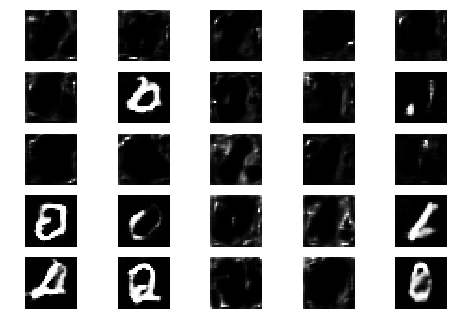

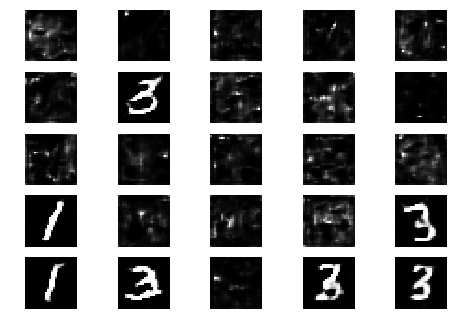

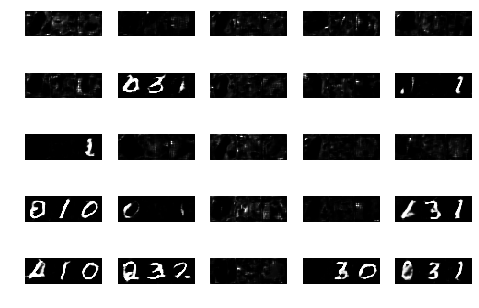

Epoch 1 Batch 1401/1875 [D loss: 0.546600, acc.: 84.38%] [G loss: 1.905328]
Epoch 1 Batch 1402/1875 [D loss: 0.522290, acc.: 75.00%] [G loss: 0.875143]
Epoch 1 Batch 1403/1875 [D loss: 0.590195, acc.: 68.75%] [G loss: 1.620865]
Epoch 1 Batch 1404/1875 [D loss: 0.492784, acc.: 75.00%] [G loss: 1.209460]
Epoch 1 Batch 1405/1875 [D loss: 0.727049, acc.: 71.88%] [G loss: 1.842786]
Epoch 1 Batch 1406/1875 [D loss: 0.482544, acc.: 81.25%] [G loss: 2.455851]
Epoch 1 Batch 1407/1875 [D loss: 0.448905, acc.: 84.38%] [G loss: 2.655777]
Epoch 1 Batch 1408/1875 [D loss: 0.175398, acc.: 93.75%] [G loss: 1.949033]
Epoch 1 Batch 1409/1875 [D loss: 0.296116, acc.: 93.75%] [G loss: 1.397850]
Epoch 1 Batch 1410/1875 [D loss: 0.521574, acc.: 81.25%] [G loss: 1.321095]
Epoch 1 Batch 1411/1875 [D loss: 0.333418, acc.: 81.25%] [G loss: 1.812400]
Epoch 1 Batch 1412/1875 [D loss: 0.560467, acc.: 68.75%] [G loss: 2.137635]
Epoch 1 Batch 1413/1875 [D loss: 0.639259, acc.: 62.50%] [G loss: 1.970812]
Epoch 1 Batc

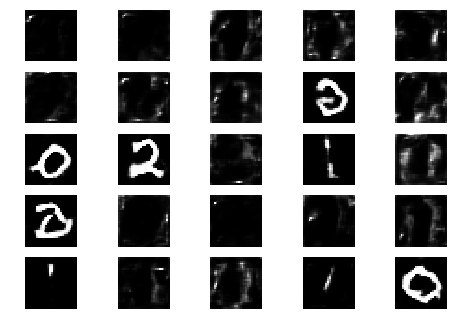

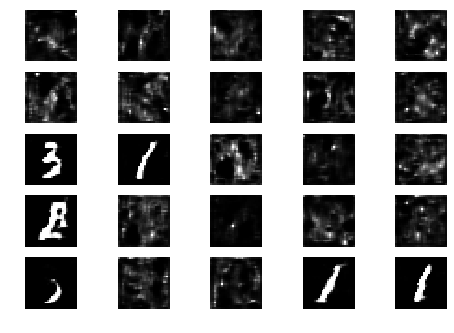

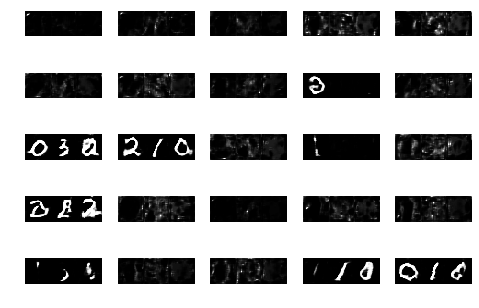

Epoch 1 Batch 1501/1875 [D loss: 0.642715, acc.: 68.75%] [G loss: 1.954100]
Epoch 1 Batch 1502/1875 [D loss: 0.137458, acc.: 100.00%] [G loss: 2.420786]
Epoch 1 Batch 1503/1875 [D loss: 0.269394, acc.: 90.62%] [G loss: 1.408205]
Epoch 1 Batch 1504/1875 [D loss: 0.394115, acc.: 87.50%] [G loss: 2.392741]
Epoch 1 Batch 1505/1875 [D loss: 0.188738, acc.: 90.62%] [G loss: 2.555572]
Epoch 1 Batch 1506/1875 [D loss: 0.592094, acc.: 62.50%] [G loss: 1.856886]
Epoch 1 Batch 1507/1875 [D loss: 0.321890, acc.: 90.62%] [G loss: 2.285123]
Epoch 1 Batch 1508/1875 [D loss: 0.347090, acc.: 90.62%] [G loss: 2.544012]
Epoch 1 Batch 1509/1875 [D loss: 0.219864, acc.: 100.00%] [G loss: 1.526898]
Epoch 1 Batch 1510/1875 [D loss: 0.361549, acc.: 84.38%] [G loss: 1.286179]
Epoch 1 Batch 1511/1875 [D loss: 0.252412, acc.: 90.62%] [G loss: 1.855490]
Epoch 1 Batch 1512/1875 [D loss: 0.256968, acc.: 96.88%] [G loss: 2.541235]
Epoch 1 Batch 1513/1875 [D loss: 0.449078, acc.: 78.12%] [G loss: 2.543254]
Epoch 1 Ba

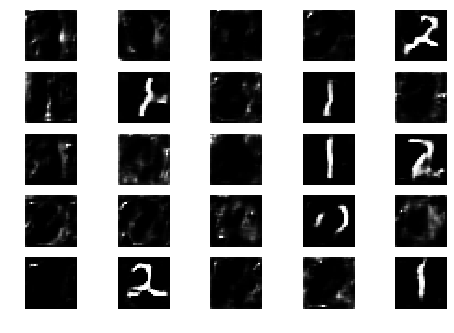

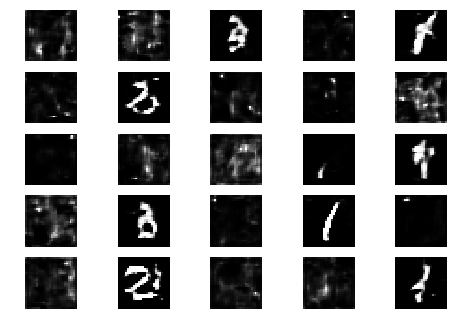

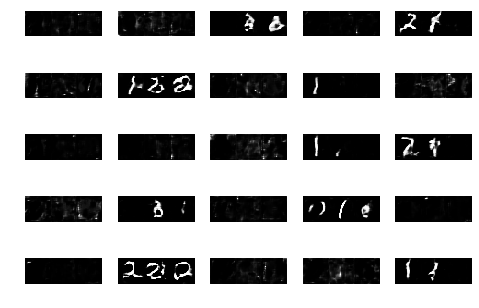

Epoch 1 Batch 1601/1875 [D loss: 0.388440, acc.: 81.25%] [G loss: 1.448603]
Epoch 1 Batch 1602/1875 [D loss: 0.615611, acc.: 56.25%] [G loss: 1.323993]
Epoch 1 Batch 1603/1875 [D loss: 0.447315, acc.: 65.62%] [G loss: 2.222806]
Epoch 1 Batch 1604/1875 [D loss: 1.244388, acc.: 31.25%] [G loss: 2.621202]
Epoch 1 Batch 1605/1875 [D loss: 0.514316, acc.: 65.62%] [G loss: 2.376211]
Epoch 1 Batch 1606/1875 [D loss: 0.405280, acc.: 75.00%] [G loss: 1.754398]
Epoch 1 Batch 1607/1875 [D loss: 0.590805, acc.: 59.38%] [G loss: 3.308690]
Epoch 1 Batch 1608/1875 [D loss: 0.546852, acc.: 65.62%] [G loss: 3.198248]
Epoch 1 Batch 1609/1875 [D loss: 0.349708, acc.: 84.38%] [G loss: 3.528319]
Epoch 1 Batch 1610/1875 [D loss: 0.890625, acc.: 50.00%] [G loss: 1.749782]
Epoch 1 Batch 1611/1875 [D loss: 0.521118, acc.: 68.75%] [G loss: 1.889760]
Epoch 1 Batch 1612/1875 [D loss: 0.355225, acc.: 90.62%] [G loss: 1.112416]
Epoch 1 Batch 1613/1875 [D loss: 0.424132, acc.: 71.88%] [G loss: 2.489506]
Epoch 1 Batc

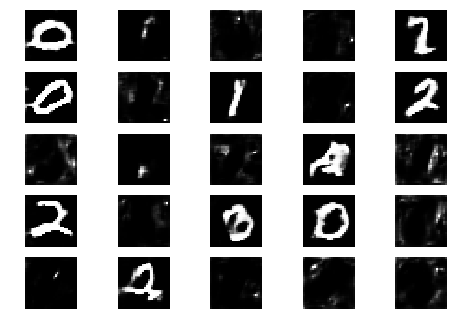

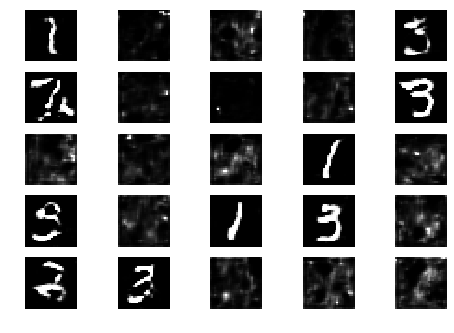

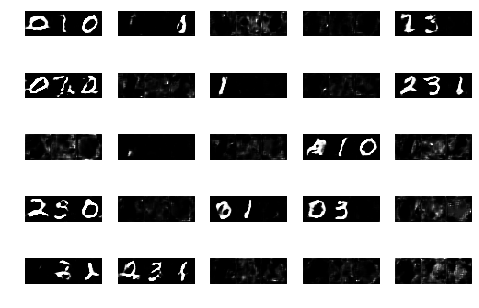

Epoch 1 Batch 1701/1875 [D loss: 0.481596, acc.: 71.88%] [G loss: 2.524650]
Epoch 1 Batch 1702/1875 [D loss: 0.264096, acc.: 96.88%] [G loss: 1.104341]
Epoch 1 Batch 1703/1875 [D loss: 0.365804, acc.: 84.38%] [G loss: 1.457293]
Epoch 1 Batch 1704/1875 [D loss: 0.431847, acc.: 75.00%] [G loss: 0.809505]
Epoch 1 Batch 1705/1875 [D loss: 0.834420, acc.: 56.25%] [G loss: 1.826214]
Epoch 1 Batch 1706/1875 [D loss: 0.541902, acc.: 71.88%] [G loss: 1.891790]
Epoch 1 Batch 1707/1875 [D loss: 0.434821, acc.: 75.00%] [G loss: 1.977490]
Epoch 1 Batch 1708/1875 [D loss: 0.548605, acc.: 71.88%] [G loss: 2.153186]
Epoch 1 Batch 1709/1875 [D loss: 0.622018, acc.: 62.50%] [G loss: 2.514754]
Epoch 1 Batch 1710/1875 [D loss: 0.399101, acc.: 84.38%] [G loss: 2.112749]
Epoch 1 Batch 1711/1875 [D loss: 0.415575, acc.: 90.62%] [G loss: 1.580485]
Epoch 1 Batch 1712/1875 [D loss: 0.574433, acc.: 68.75%] [G loss: 1.612879]
Epoch 1 Batch 1713/1875 [D loss: 0.506660, acc.: 75.00%] [G loss: 0.820162]
Epoch 1 Batc

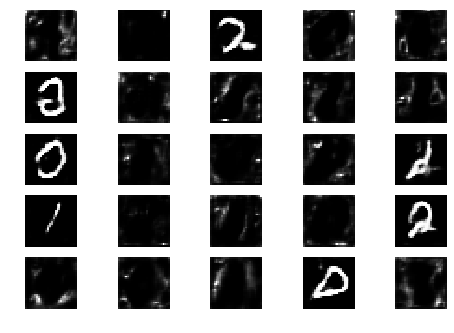

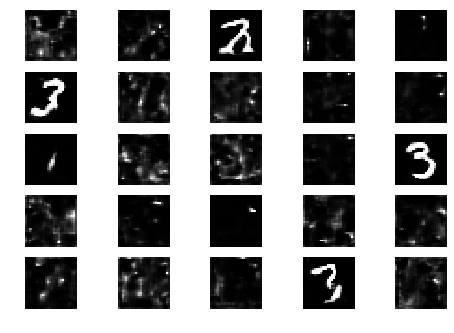

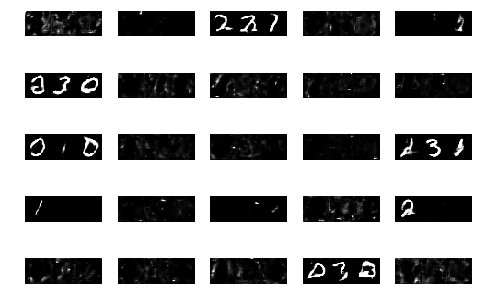

Epoch 1 Batch 1801/1875 [D loss: 0.135665, acc.: 96.88%] [G loss: 2.608874]
Epoch 1 Batch 1802/1875 [D loss: 0.356876, acc.: 93.75%] [G loss: 2.451162]
Epoch 1 Batch 1803/1875 [D loss: 0.724795, acc.: 68.75%] [G loss: 1.689844]
Epoch 1 Batch 1804/1875 [D loss: 0.307101, acc.: 90.62%] [G loss: 2.122189]
Epoch 1 Batch 1805/1875 [D loss: 0.275261, acc.: 93.75%] [G loss: 2.681511]
Epoch 1 Batch 1806/1875 [D loss: 0.332911, acc.: 90.62%] [G loss: 2.071044]
Epoch 1 Batch 1807/1875 [D loss: 0.638611, acc.: 65.62%] [G loss: 1.670022]
Epoch 1 Batch 1808/1875 [D loss: 0.245655, acc.: 84.38%] [G loss: 1.867277]
Epoch 1 Batch 1809/1875 [D loss: 0.604926, acc.: 62.50%] [G loss: 3.438862]
Epoch 1 Batch 1810/1875 [D loss: 0.348877, acc.: 93.75%] [G loss: 2.882025]
Epoch 1 Batch 1811/1875 [D loss: 0.291022, acc.: 81.25%] [G loss: 1.363931]
Epoch 1 Batch 1812/1875 [D loss: 0.835113, acc.: 62.50%] [G loss: 2.077547]
Epoch 1 Batch 1813/1875 [D loss: 0.459277, acc.: 81.25%] [G loss: 3.036186]
Epoch 1 Batc

In [28]:
train(generator1, generator2, generator3, discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNandriNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=1, modeltotrain = 3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=64, save_interval=100, modeltotrain = 3)

In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
!rm -rf generator1fminst.h5



In [0]:

generator1.save('generator1fminst.h5')



In [0]:
files.download('generator1fminst.h5')


In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 2 ,  loadpretrainedweights=False)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=1, batch_size=32, save_interval=20, modeltotrain=3)

In [0]:
!rm -rf generator2fmnist.h5


In [0]:

generator2.save('generator2fmnist.h5')

In [0]:
!ls -al


In [0]:
files.download('generator2fmnist.h5')

In [0]:
##!wget https://github.com/rajagopalmotivate/try1/raw/master/generatorTrainedepoch2git.h5

In [0]:
!rm -rf generator1fminst.h5
!rm -rf generator2fminst.h5

In [0]:
!ls -all

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator1fminst.h5

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator2fminst.h5

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
plotamodel(combined, showdetails=True )
files.download('model.png')

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=1)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=2)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
plotamodel(combined)
files.download('model.png')

In [0]:
!rm -rf generatorTrainedepoch2.h5

generator1.save('generator1fminst.h5')

!rm -rf generator2Trainedepoch2.h5

generator2.save('generator2fminst.h5')


In [0]:
generator1 = generator1.load_weights('generator1fmnist.h5')


In [0]:
generator2 = generator2.load_weights('generator1fminst.h5')




In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1)

In [0]:
generator1.save('generatorTrained1epoch4.h5')

In [0]:
files.download('generator1fmnist.h5')

In [0]:
files.download('generator2fmnist.h5')

In [0]:
##files.download('discriminator1.h5')

In [0]:
##files.download('combined1.h5')

In [0]:
#generator1 = load_model('generator1.h5')
#discriminator1 = load_model('discriminator1.h5')
#combined1 = load_model('combined1.h5')

